## Lead Scoring Case Study

- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

- There are some more problems presented by the company which the model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well.


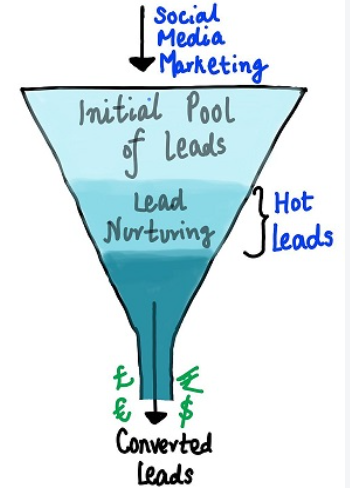

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing Pandas and NumPy
import pandas as pd, numpy as np
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm


In [2]:
# Importing Leads data
lead = pd.read_csv("C:/Data/Leads.csv")
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
lead_raw = lead

In [4]:
lead_raw['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [5]:
lead.shape

(9240, 37)

In [6]:
lead['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [7]:
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [9]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [10]:
# List of variables to map

varlist =  ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses',
           'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque',
           'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
lead[varlist] = lead[varlist].apply(binary_map)

In [11]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,NaN,0,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Select,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Select,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified


### Exploratory Data Analysis

In [12]:
col_names = ['Lead Origin', 'Lead Source', 'Last Activity', 'Country', 'Specialization', 'How did you hear about X Education', 
             'What is your current occupation', 'What matters most to you in choosing a course', 'Tags', 'Lead Quality',
            'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Last Notable Activity']


for col in col_names:
    
    print(lead[col].value_counts())   

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Li

In [13]:
lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [14]:
list(lead.columns[100*lead.isnull().mean() >= 40])

['Lead Quality',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [15]:
# Identify & drop all columns that have null values >= 40%
drop_null_cols = list(lead.columns[100*lead.isnull().mean() >= 40])
print(drop_null_cols)

['Lead Quality', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']


In [16]:
lead.drop(drop_null_cols, axis = 1, inplace = True)

In [17]:
list(lead.columns[100*lead.isnull().mean() >= 40])

[]

In [18]:
lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [19]:
# Drop country & city as they do not contribute to the scoring
lead.drop(['Country', 'City'], axis = 1, inplace = True)

In [20]:
lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

In [21]:
lead['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [22]:
lead.loc[lead['Specialization'] == 'Select']

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,0,0,Select,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,0,0,Select,0,0,Email Opened
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Select,Other,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,0,0,Select,0,0,Modified
15,25f4ac14-ff4b-4cd2-9c61-b44c85e19c8f,660547,API,Organic Search,0,0,1,6.0,1012,6.0,Email Opened,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,0,0,Select,0,0,Email Opened
17,e5c3beca-a0b6-4b3f-8c01-0919fb9ca3f2,660534,API,Referral Sites,0,0,0,6.0,973,6.0,Email Link Clicked,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,0,0,Select,0,0,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9204,8b7c2e60-ac6a-4ffc-8d85-93825e548ddb,579883,API,Google,0,0,0,2.0,12,2.0,Email Opened,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,0,0,Potential Lead,0,0,Email Opened
9206,c1ec7b92-dc83-44a9-90c2-fdd0a9b2690d,579869,API,Organic Search,0,0,0,2.0,1370,2.0,SMS Sent,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,0,0,Potential Lead,0,0,Modified
9217,b8872c12-7534-498d-8f4a-e79a19516db1,579786,API,Olark Chat,0,0,0,0.0,0,0.0,SMS Sent,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,0,0,Potential Lead,0,0,SMS Sent
9226,c3bb1471-53d5-4244-b2e5-4bbb543835c1,579735,API,Olark Chat,0,0,0,0.0,0,0.0,SMS Sent,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,0,0,Select,0,0,Modified


In [23]:
lead['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [24]:
# Assuming 'Select' is equivalent to NULL, hence updating it with more relevant/ frequent Specialization 
lead.loc[lead['Specialization'] == 'Select', 'Specialization'] = 'Finance Management'

In [25]:
lead['Specialization'].value_counts()

Finance Management                   2918
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [26]:
100*lead.isnull().mean()

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.0000

In [27]:
lead['What matters most to you in choosing a course'].value_counts(ascending = False)

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [28]:
lead[ lead['What matters most to you in choosing a course'].isnull() ]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,0,0,0,0.0,0,0.0,Olark Chat Conversation,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,NaN,0,0,NaN,0,0,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,0,0,0,0.0,0,0.0,Olark Chat Conversation,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,NaN,0,0,NaN,0,0,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,0,0,0,2.0,71,2.0,Email Opened,IT Projects Management,NaN,NaN,NaN,0,0,0,0,0,0,0,0,NaN,0,0,NaN,0,1,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,0,0,0,4.0,58,4.0,Email Opened,Finance Management,Word Of Mouth,NaN,NaN,0,0,0,0,0,0,0,0,NaN,0,0,NaN,0,0,Email Opened
16,3abb7c77-1634-4083-9a9f-861068220611,660540,API,Olark Chat,0,0,0,0.0,0,0.0,Olark Chat Conversation,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,NaN,0,0,NaN,0,0,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9213,d4587acb-02d1-4c5e-9110-6032d829bac1,579822,Landing Page Submission,Direct Traffic,1,0,0,5.0,234,2.5,Page Visited on Website,E-COMMERCE,NaN,NaN,NaN,0,0,0,0,0,0,0,0,NaN,0,0,NaN,0,0,Modified
9214,479a8b1c-d410-4220-a24f-854a376be43d,579808,API,Organic Search,0,0,1,2.0,881,2.0,SMS Sent,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,NaN,0,0,NaN,0,0,SMS Sent
9215,06334ac1-64a8-444c-92a7-117dcd26dea5,579802,Landing Page Submission,Organic Search,0,0,0,8.0,397,8.0,Email Opened,Business Administration,NaN,NaN,NaN,0,0,0,0,0,0,0,0,NaN,0,0,NaN,0,1,Email Opened
9218,eee466be-b98c-4126-9220-fc406093b9ce,579784,Landing Page Submission,Google,1,0,0,1.0,149,1.0,Email Bounced,Human Resource Management,Student of SomeSchool,NaN,NaN,0,0,0,0,0,0,0,0,NaN,0,0,NaN,0,0,Modified


In [29]:
# Imputing the NULL with most relevant value

lead.loc[ lead['What matters most to you in choosing a course'].isnull(), 'What matters most to you in choosing a course' ] = 'Better Career Prospects'

In [30]:
100*lead.isnull().mean()

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course     0.000000
Search                                            0.000000
Magazine                                          0.0000

In [31]:
lead['Tags'].value_counts(ascending = False)

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [32]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Finance Management,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,0,0,Select,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Finance Management,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,0,0,Select,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Select,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,0,0,Potential Lead,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,0,0,Select,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Finance Management,Other,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,0,0,Select,0,0,Modified


In [33]:
lead.loc[ lead['Tags'].isnull(), 'Tags' ] = 'Blank_Tags'

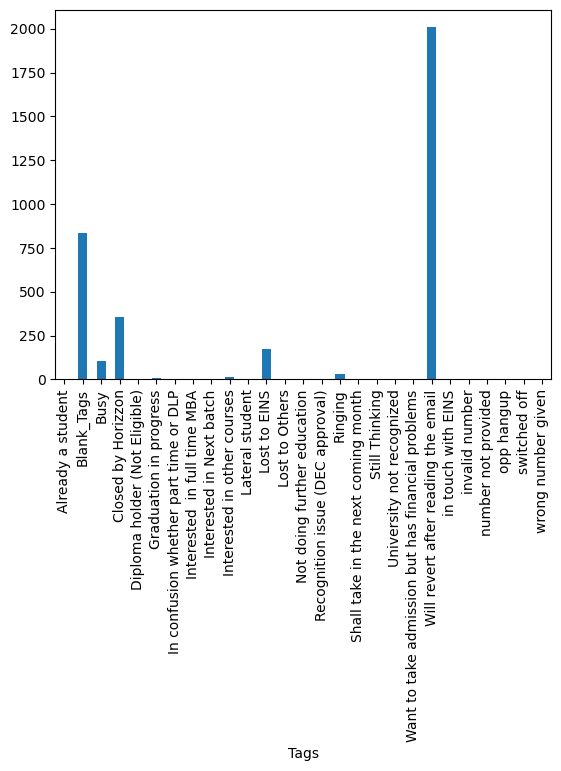

In [34]:
# How Tags values fare against the conversion
lead.groupby(by = 'Tags')['Converted'].sum().plot.bar()
plt.show()

In [35]:
# Imputing NULL Tags with relevant/ most probable value

lead.loc[ lead['Tags'] == 'Blank_Tags', 'Tags' ] = 'Will revert after reading the email'

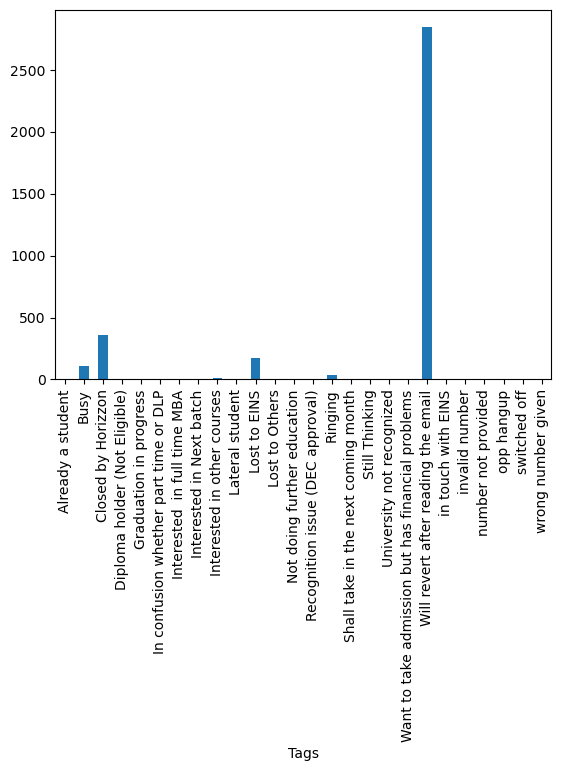

In [36]:
lead.groupby(by = 'Tags')['Converted'].sum().plot.bar()
plt.show()

In [37]:
100*lead.isnull().mean()

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course     0.000000
Search                                            0.000000
Magazine                                          0.0000

In [38]:
lead['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [39]:
lead.loc[lead['Lead Profile'].isnull(), 'Lead Profile'] = 'Blank_Profile'

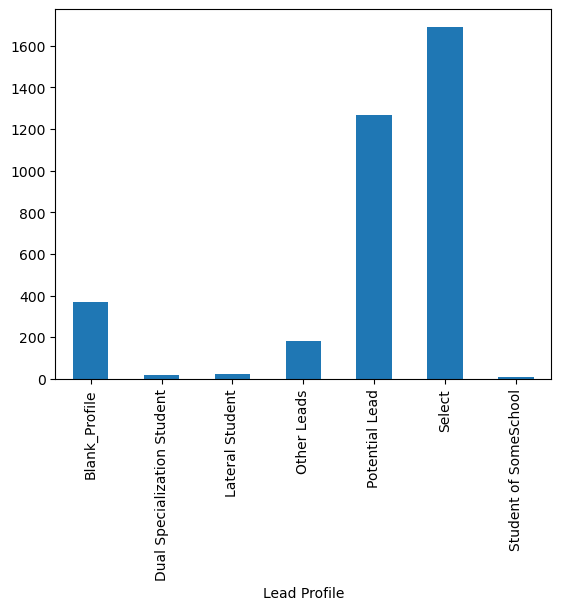

In [40]:
# How Lead Profile fare against the Conversion

lead.groupby(by = 'Lead Profile')['Converted'].sum().plot.bar()
plt.show()

In [41]:
# Imputing Lead Profile with most frequent value

lead.loc[lead['Lead Profile'].isin(['Blank_Profile','Select']), 'Lead Profile'] = 'Potential Lead'

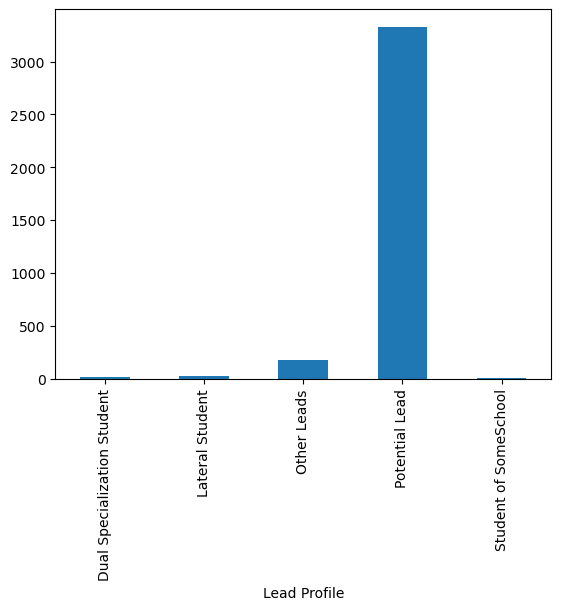

In [42]:
lead.groupby(by = 'Lead Profile')['Converted'].sum().plot.bar()
plt.show()

In [43]:
lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course       0
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

In [44]:
lead['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [45]:
lead['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [46]:
lead['What is your current occupation'].isnull().sum()

2690

In [47]:
# Imputing this column with NULL equivalent value for better visibility

lead.loc[ lead['What is your current occupation'].isnull(), 'What is your current occupation' ] = 'Blank_Occupation'

In [48]:
lead['What is your current occupation'].isnull().sum()

0

In [49]:
lead['What is your current occupation'].value_counts()

Unemployed              5600
Blank_Occupation        2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [50]:
lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                     0
What matters most to you in choosing a course       0
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

In [51]:
# Imputing this column with NULL equivalent value for better visibility
lead.loc[ lead['How did you hear about X Education'].isnull(), 'How did you hear about X Education' ] = 'Blank_Lead_Source'

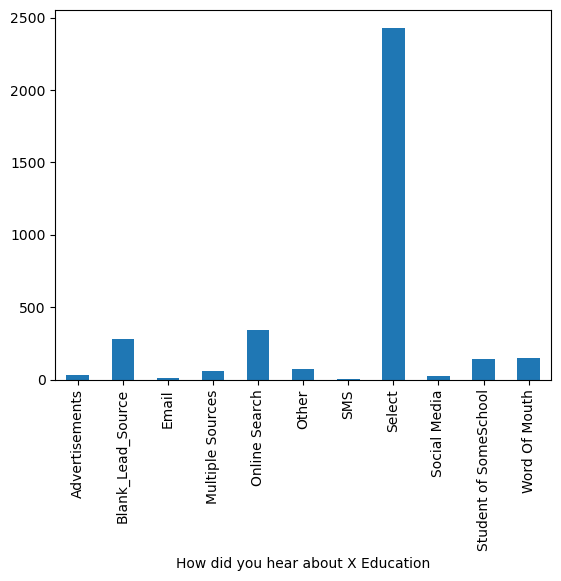

In [52]:
lead.groupby(by = 'How did you hear about X Education')['Converted'].sum().plot.bar()
plt.show()

In [53]:
lead['How did you hear about X Education'].value_counts()

Select                   5043
Blank_Lead_Source        2207
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [54]:
# Imputing this column with NULL equivalent value assuming 'Select' is blank, for better visibility

lead.loc[ lead['How did you hear about X Education'] == 'Select', 'How did you hear about X Education' ] = 'Blank_Lead_Source'

In [55]:
lead['How did you hear about X Education'].value_counts()

Blank_Lead_Source        7250
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

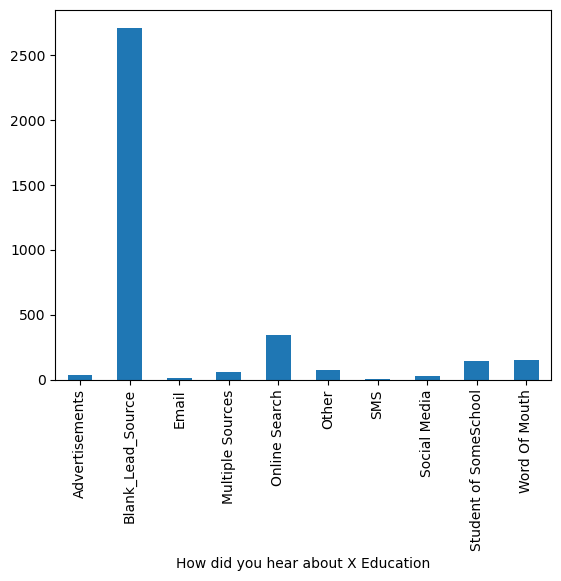

In [56]:
lead.groupby(by = 'How did you hear about X Education')['Converted'].sum().plot.bar()
plt.show()

In [57]:
lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Specialization                                   1438
How did you hear about X Education                  0
What is your current occupation                     0
What matters most to you in choosing a course       0
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

In [58]:
lead['Specialization'].value_counts()

Finance Management                   2918
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [59]:
#Imputing Specialization with NULL equivalent value for better visibility

lead.loc[ lead['Specialization'].isnull(), 'Specialization' ] = 'Blank_Specialization'

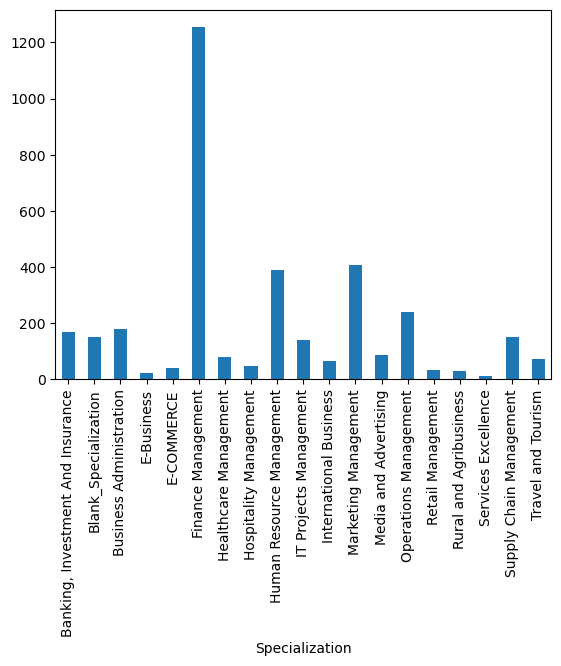

In [60]:
lead.groupby(by = 'Specialization')['Converted'].sum().plot.bar()
plt.show()

In [61]:
lead['Specialization'].value_counts()

Finance Management                   2918
Blank_Specialization                 1438
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [62]:
lead.isnull().sum()

Prospect ID                                        0
Lead Number                                        0
Lead Origin                                        0
Lead Source                                       36
Do Not Email                                       0
Do Not Call                                        0
Converted                                          0
TotalVisits                                      137
Total Time Spent on Website                        0
Page Views Per Visit                             137
Last Activity                                    103
Specialization                                     0
How did you hear about X Education                 0
What is your current occupation                    0
What matters most to you in choosing a course      0
Search                                             0
Magazine                                           0
Newspaper Article                                  0
X Education Forums                            

In [63]:
#Imputing this column with NULL equivalent value for better visibility

lead.loc[ lead['Last Activity'].isnull(), 'Last Activity' ] = 'Blank_Last Activity'

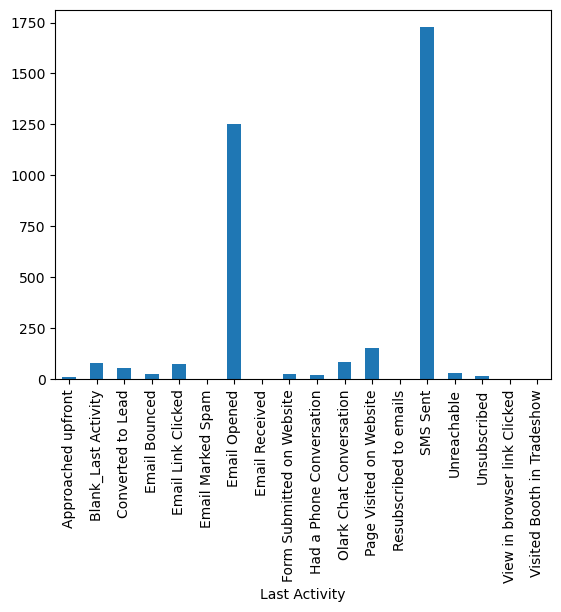

In [64]:
lead.groupby(by = 'Last Activity')['Converted'].sum().plot.bar()
plt.show()

In [65]:
lead['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Blank_Last Activity              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [66]:
#Imputing it further with most frequent vlaue

lead.loc[ lead['Last Activity'] == 'Blank_Last Activity', 'Last Activity' ] = 'Email Opened'

In [67]:
lead.isnull().sum()

Prospect ID                                        0
Lead Number                                        0
Lead Origin                                        0
Lead Source                                       36
Do Not Email                                       0
Do Not Call                                        0
Converted                                          0
TotalVisits                                      137
Total Time Spent on Website                        0
Page Views Per Visit                             137
Last Activity                                      0
Specialization                                     0
How did you hear about X Education                 0
What is your current occupation                    0
What matters most to you in choosing a course      0
Search                                             0
Magazine                                           0
Newspaper Article                                  0
X Education Forums                            

In [68]:
lead['Page Views Per Visit'].dtype

dtype('float64')

In [69]:
lead.loc[ lead['Page Views Per Visit'].isnull(), 'Page Views Per Visit' ] = 99999

In [70]:
lead['Page Views Per Visit'].value_counts()

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
2.56       1
6.33       1
1.64       1
8.21       1
2.08       1
Name: Page Views Per Visit, Length: 115, dtype: int64

In [71]:
lead['Page Views Per Visit'].dtype

dtype('float64')

In [72]:
#Imputing it with median value

lead.loc[lead['Page Views Per Visit'] == 99999, 'Page Views Per Visit'] = lead['Page Views Per Visit'].median()

In [73]:
lead['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [74]:
lead['TotalVisits'].median()

3.0

In [75]:
#Imputing it with median value

lead.loc[lead['TotalVisits'].isnull(), 'TotalVisits'] = lead['TotalVisits'].median()

In [76]:
#Imputing it with most frequent/ relevant value

lead.loc[lead['Lead Source'].isnull(), 'Lead Source'] = 'Google'

In [77]:
lead['Lead Source'].value_counts()

Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [78]:
lead.isnull().sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Specialization                                   0
How did you hear about X Education               0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                      

In [79]:
#Now there are no more NULL values in the Lead data set

In [80]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9240 non-null   object 
 4   Do Not Email                                   9240 non-null   int64  
 5   Do Not Call                                    9240 non-null   int64  
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9240 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9240 

In [81]:
#Get more precise descriptions

lead.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.0,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.0,9240.0,9240.0,9240.0,9240.000000
mean,617188.435606,0.079437,0.000216,0.385390,3.438636,487.698268,2.357440,0.001515,0.0,0.000216,0.000108,0.000108,0.000433,0.000758,0.0,0.0,0.0,0.0,0.312554
std,23405.995698,0.270435,0.014711,0.486714,4.819024,548.021466,2.145781,0.038898,0.0,0.014711,0.010403,0.010403,0.020803,0.027515,0.0,0.0,0.0,0.0,0.463559
min,579533.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
25%,596484.500000,0.000000,0.000000,0.000000,1.000000,12.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
50%,615479.000000,0.000000,0.000000,0.000000,3.000000,248.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
75%,637387.250000,0.000000,0.000000,1.000000,5.000000,936.000000,3.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000
90%,650506.100000,0.000000,0.000000,1.000000,7.000000,1380.000000,5.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000
95%,655404.050000,1.000000,0.000000,1.000000,10.000000,1562.000000,6.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000
99%,659592.980000,1.000000,0.000000,1.000000,17.000000,1840.610000,9.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000


### Outlier Treatment

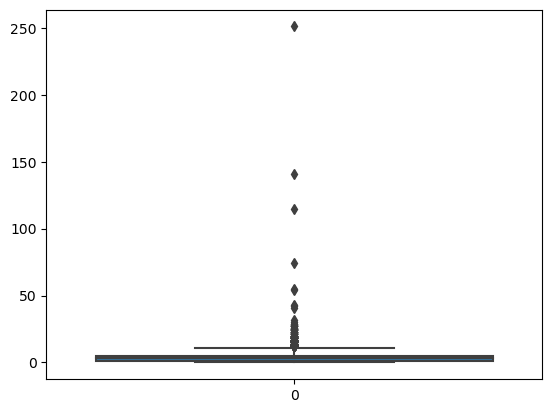

In [82]:
# plt.figure(figsize=(20, 12))
# plt.subplot(2,3,1)
# sns.boxplot(x = 'TotalVisits', y = 'Converted', data = lead)
# # plt.subplot(2,3,2)
# sns.boxplot(x = 'Total Time Spent on Website', y = 'Converted', data = lead)
# plt.subplot(2,3,3)
# sns.boxplot(x = 'Page Views Per Visit', y = 'Converted', data = lead)

sns.boxplot(lead['TotalVisits'])
plt.show()


In [83]:
lead[ lead['TotalVisits'] > 30 ]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
1160,424e4ffd-efc9-4dc8-8cd2-5cf3b3e56223,647818,Landing Page Submission,Direct Traffic,0,0,0,43.0,57,3.91,Email Opened,Marketing Management,Online Search,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Not doing further education,0,0,Other Leads,0,0,Email Opened
2190,0e4c0711-6cb5-455d-8e0d-7f9f2cc4f895,638668,Landing Page Submission,Direct Traffic,1,0,0,55.0,297,55.00,Page Visited on Website,IT Projects Management,Blank_Lead_Source,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,0,0,Potential Lead,0,1,Modified
2322,272696ed-4aff-4b42-8829-b63f122493d9,637257,Landing Page Submission,Direct Traffic,1,0,0,141.0,755,6.71,Page Visited on Website,Human Resource Management,Blank_Lead_Source,Blank_Occupation,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,0,0,Potential Lead,0,1,Page Visited on Website
5283,8d5d2f30-7ca5-4406-9d2b-3b97114b2cf3,609249,Landing Page Submission,Direct Traffic,1,0,0,74.0,1209,12.33,Page Visited on Website,Finance Management,Advertisements,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Not doing further education,0,0,Potential Lead,0,0,Page Visited on Website
5530,ac2645d4-d3b6-4574-9e7b-6b380db4a127,607494,Landing Page Submission,Direct Traffic,1,0,0,41.0,311,1.14,Page Visited on Website,Retail Management,Blank_Lead_Source,Blank_Occupation,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,0,0,Potential Lead,0,0,Page Visited on Website
5538,b978e9bb-8960-4d23-b7e4-4db879f05a6c,607470,Landing Page Submission,Referral Sites,0,0,0,54.0,1280,4.50,SMS Sent,Finance Management,Advertisements,Blank_Occupation,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,0,0,Potential Lead,0,0,SMS Sent
5608,0fb67fc7-ec4b-4096-b3b4-4732f1fa2449,606961,Landing Page Submission,Referral Sites,1,0,0,115.0,187,8.21,Page Visited on Website,Rural and Agribusiness,Blank_Lead_Source,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,0,0,Potential Lead,0,0,Page Visited on Website
6102,f787f694-b4c4-4763-a4ae-9f39a0a052b6,602958,Landing Page Submission,Direct Traffic,0,0,1,251.0,49,1.48,Page Visited on Website,Supply Chain Management,Blank_Lead_Source,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,0,0,Potential Lead,0,1,Page Visited on Website
6580,5f244ffd-0219-47e7-a37c-56ec86c1f466,599321,API,Google,0,0,0,32.0,26,1.78,Email Opened,Finance Management,Blank_Lead_Source,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,0,0,Potential Lead,0,0,Email Opened
8230,3d3838be-070a-40e0-93e6-c53d4880e6fc,587083,Landing Page Submission,Direct Traffic,1,0,0,42.0,1148,3.82,Page Visited on Website,Finance Management,Online Search,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Not doing further education,0,0,Other Leads,0,0,Modified


In [84]:
lead['TotalVisits'].aggregate(['mean', 'median', 'max', 'min'])

mean        3.438636
median      3.000000
max       251.000000
min         0.000000
Name: TotalVisits, dtype: float64

In [85]:
lead = lead[ ~(lead['TotalVisits'] > 30) ]

In [86]:
lead['TotalVisits'].aggregate(['mean', 'median', 'max', 'min'])

mean       3.350488
median     3.000000
max       30.000000
min        0.000000
Name: TotalVisits, dtype: float64

In [87]:
lead[ lead['TotalVisits'] > 30]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


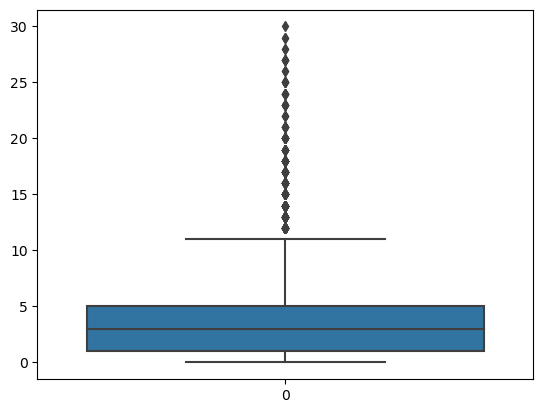

In [88]:
sns.boxplot(lead['TotalVisits'])
plt.show()


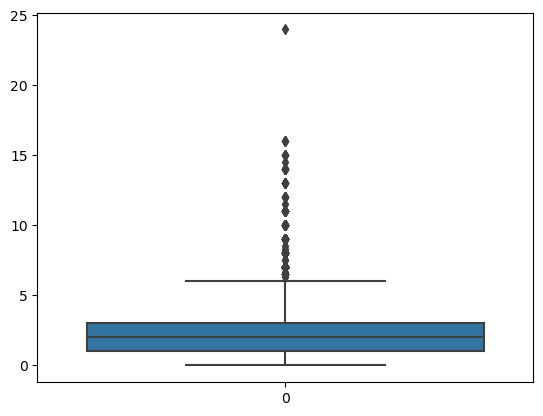

In [89]:
sns.boxplot(lead['Page Views Per Visit'])
plt.show()



In [90]:
lead = lead[ ~(lead['Page Views Per Visit'] > 15) ]

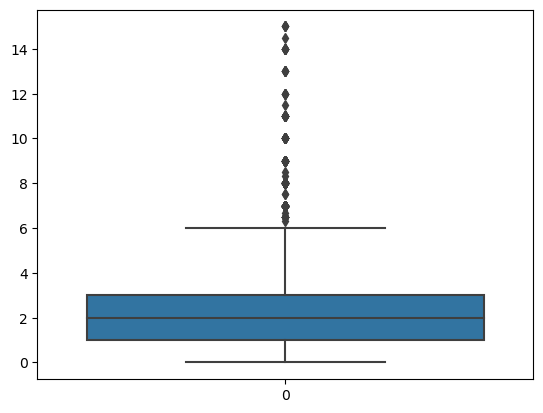

In [91]:
sns.boxplot(lead['Page Views Per Visit'])
plt.show()

In [92]:
lead.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
count,9226.000000,9226.000000,9226.000000,9226.000000,9226.000000,9226.000000,9226.000000,9226.000000,9226.0,9226.000000,9226.000000,9226.000000,9226.000000,9226.000000,9226.0,9226.0,9226.0,9226.0,9226.000000
mean,617190.758834,0.078691,0.000217,0.385758,3.344136,487.629308,2.342496,0.001517,0.0,0.000217,0.000108,0.000108,0.000434,0.000759,0.0,0.0,0.0,0.0,0.312486
std,23410.150887,0.269270,0.014723,0.486800,3.380966,548.059264,2.044900,0.038927,0.0,0.014723,0.010411,0.010411,0.020819,0.027536,0.0,0.0,0.0,0.0,0.463532
min,579533.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
25%,596475.750000,0.000000,0.000000,0.000000,1.000000,12.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
50%,615500.500000,0.000000,0.000000,0.000000,3.000000,248.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
75%,637387.750000,0.000000,0.000000,1.000000,5.000000,936.000000,3.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000
90%,650506.500000,0.000000,0.000000,1.000000,7.000000,1380.000000,5.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000
95%,655403.750000,1.000000,0.000000,1.000000,9.000000,1562.000000,6.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000
99%,659595.500000,1.000000,0.000000,1.000000,16.000000,1840.750000,9.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000


TotalVisits


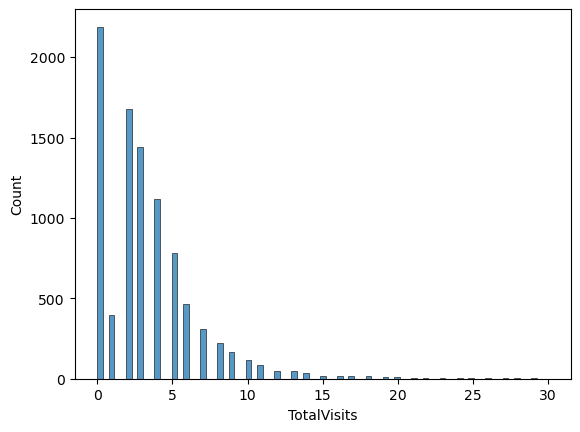

Total Time Spent on Website


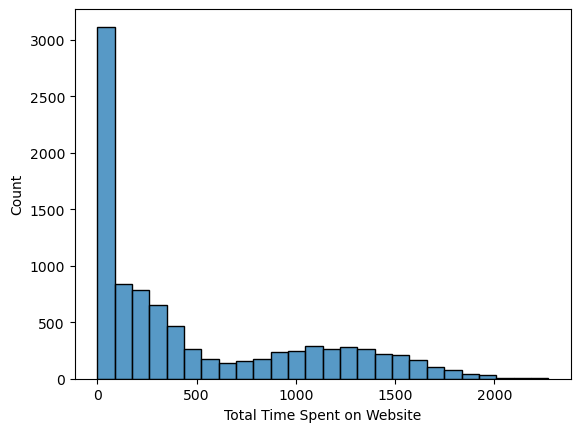

Page Views Per Visit


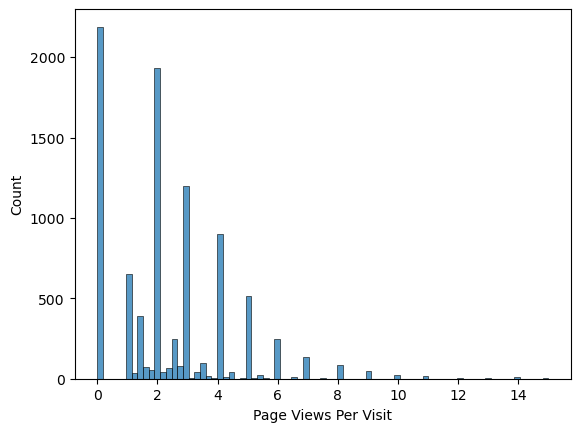

In [93]:
cont_cols=["TotalVisits","Total Time Spent on Website",'Page Views Per Visit']

for i in cont_cols:
    print(i)
    sns.histplot(x=lead[i])
    plt.show()

Do Not Email


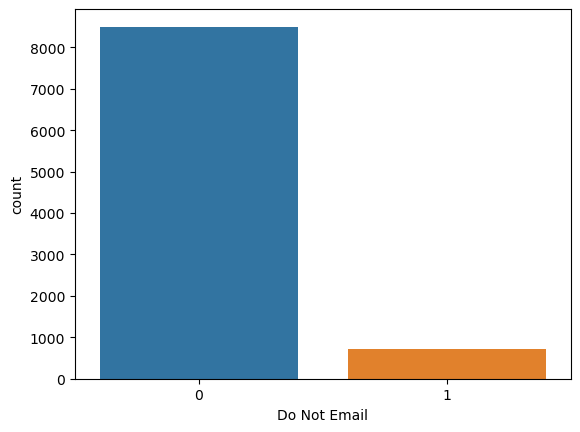

Do Not Call


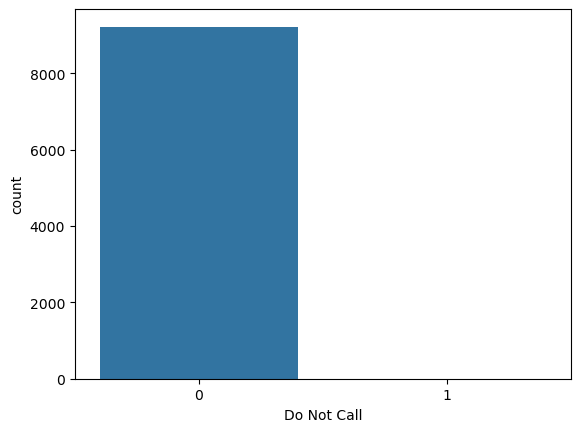

Search


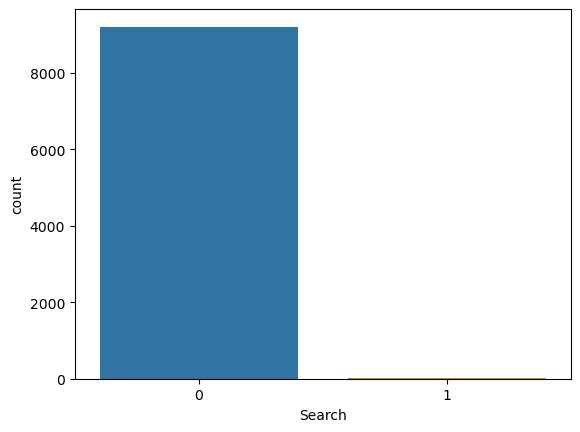

Magazine


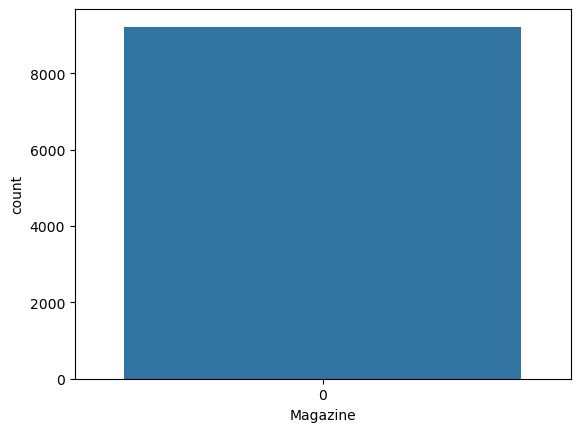

Newspaper Article


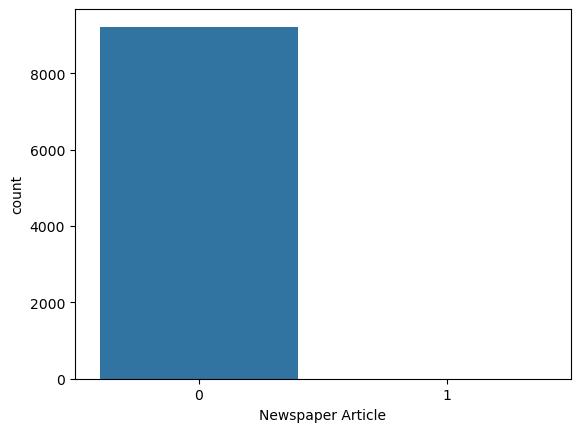

X Education Forums


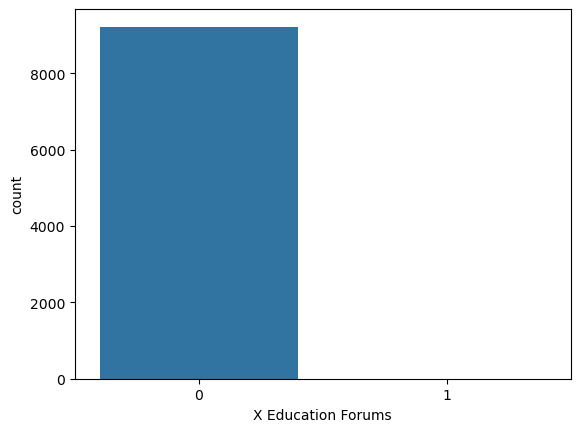

Newspaper


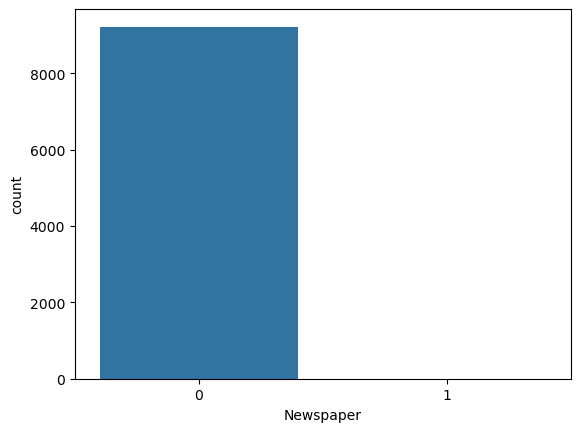

Digital Advertisement


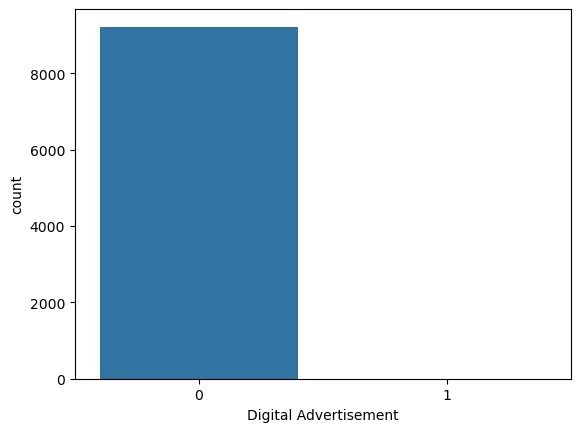

Through Recommendations


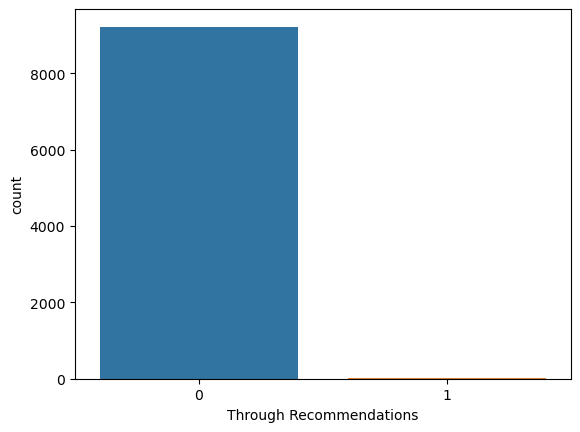

Receive More Updates About Our Courses


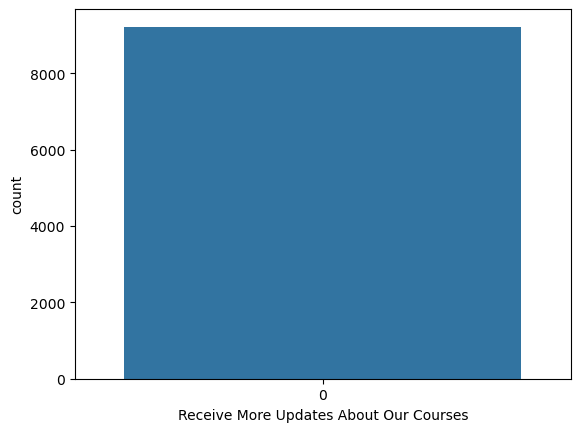

Update me on Supply Chain Content


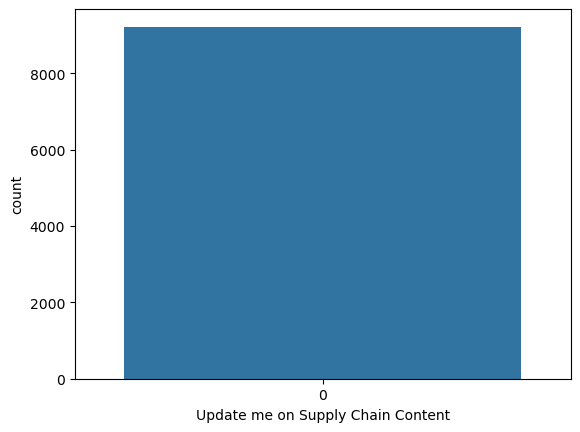

I agree to pay the amount through cheque


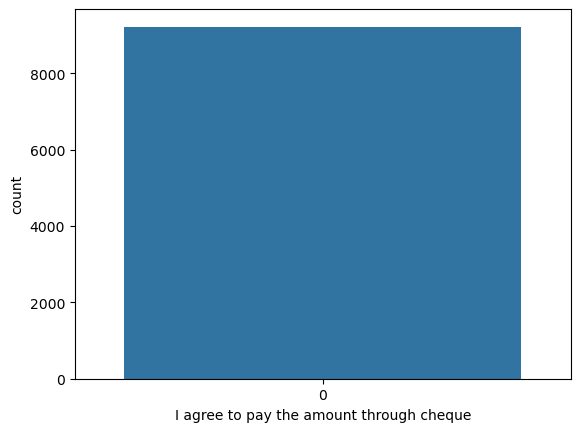

A free copy of Mastering The Interview


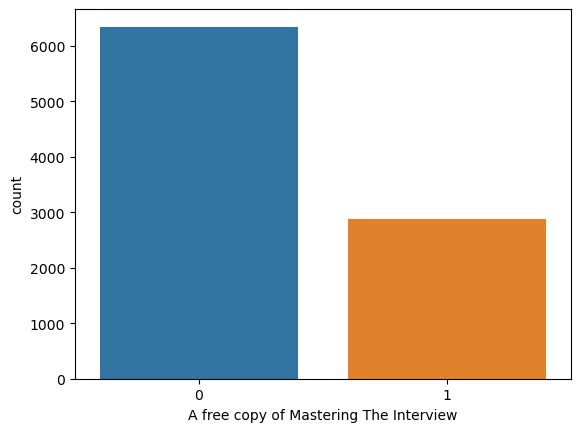

In [94]:
cat_cols = ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article','X Education Forums','Newspaper','Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview']
for i in cat_cols:
    print(i)
    sns.countplot(x=lead[i])
    plt.show()

Boxplot Converted Vs Do Not Email


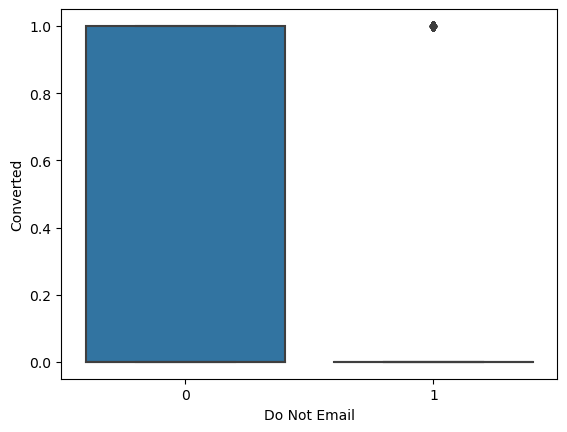

Boxplot Converted Vs Do Not Call


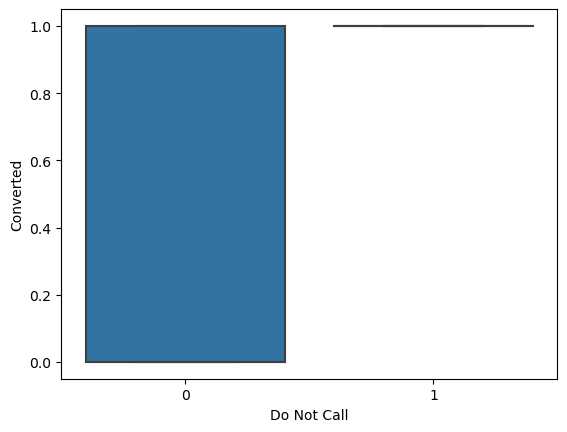

Boxplot Converted Vs Search


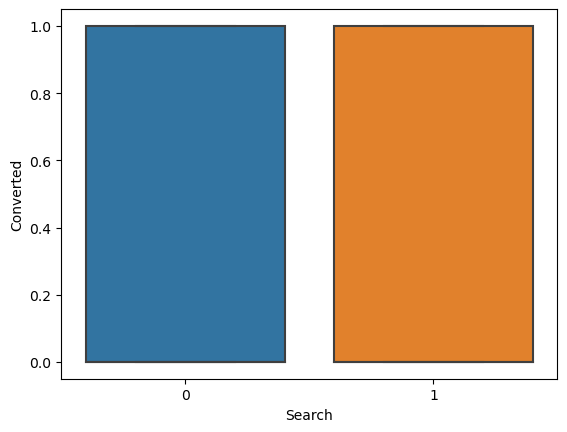

Boxplot Converted Vs Magazine


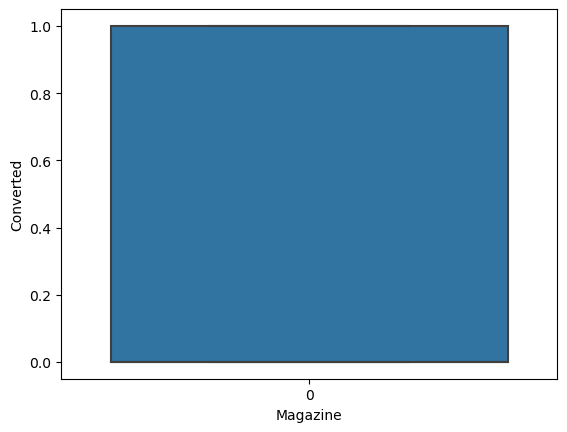

Boxplot Converted Vs Newspaper Article


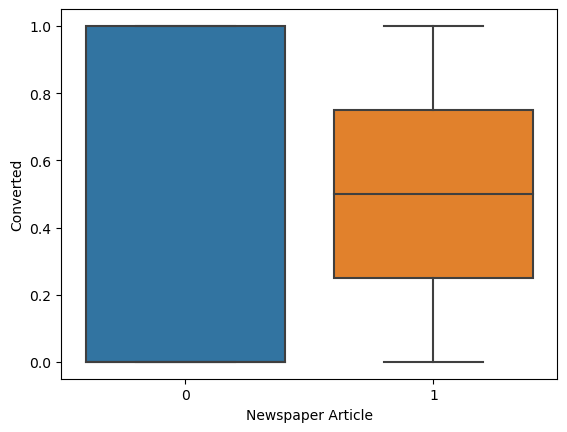

Boxplot Converted Vs X Education Forums


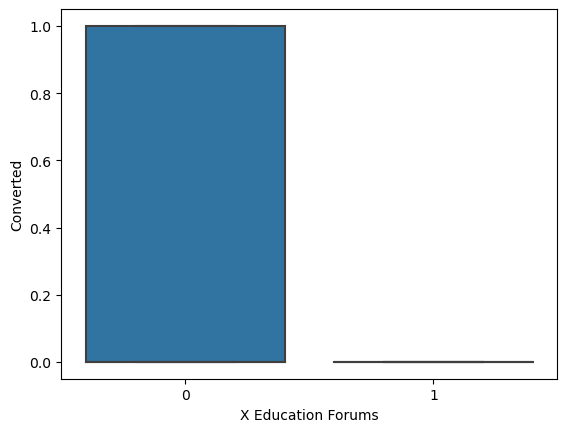

Boxplot Converted Vs Newspaper


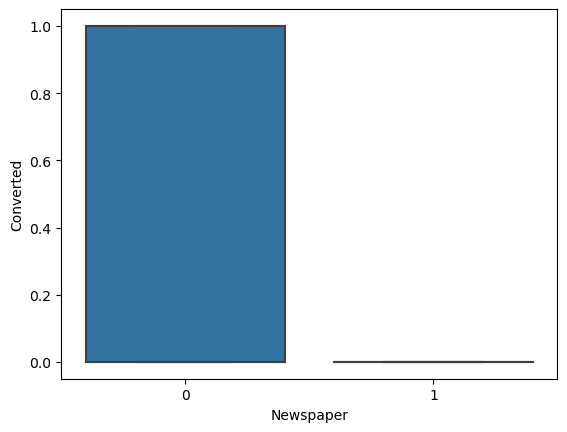

Boxplot Converted Vs Digital Advertisement


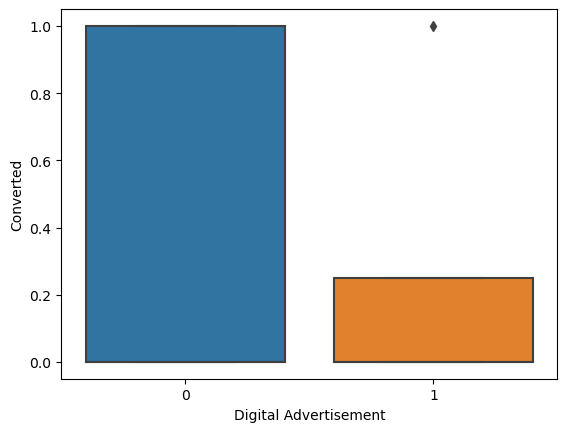

Boxplot Converted Vs Through Recommendations


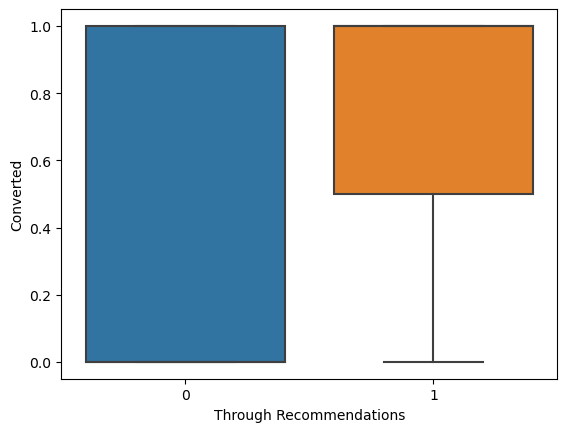

Boxplot Converted Vs Receive More Updates About Our Courses


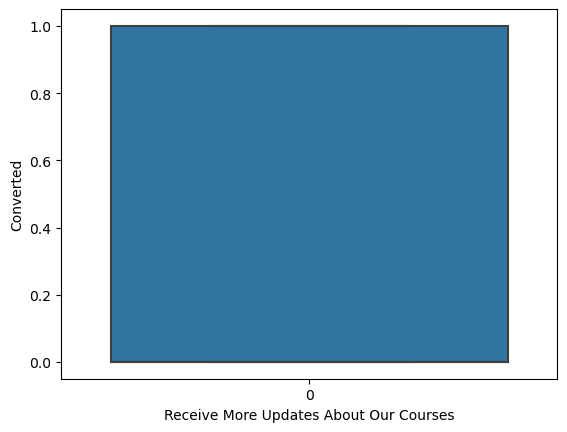

Boxplot Converted Vs Update me on Supply Chain Content


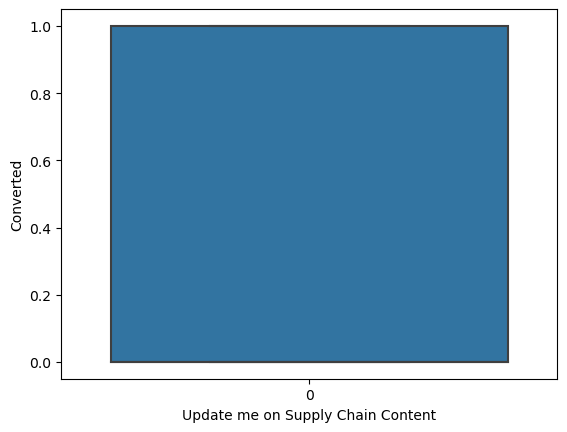

Boxplot Converted Vs I agree to pay the amount through cheque


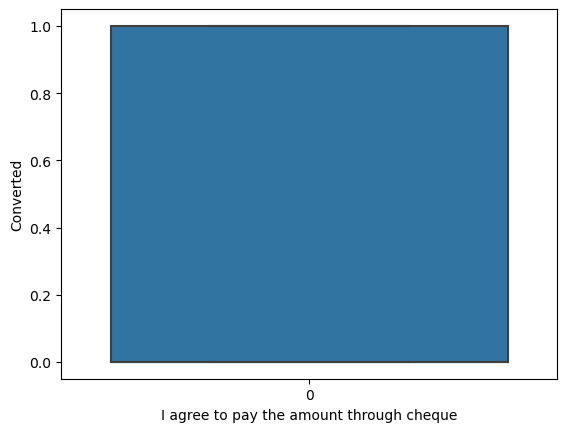

Boxplot Converted Vs A free copy of Mastering The Interview


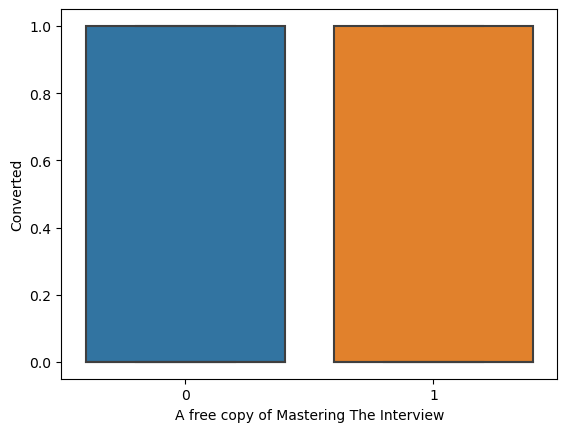

In [95]:
cont_cols = ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article','X Education Forums','Newspaper','Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview']

for i in cont_cols:
    print("Boxplot",'Converted',"Vs",i)
    sns.boxplot(x = lead[i], y = lead['Converted'])
    plt.show()

In [96]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Finance Management,Blank_Lead_Source,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,0,0,Potential Lead,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Finance Management,Blank_Lead_Source,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,0,0,Potential Lead,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Blank_Lead_Source,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,0,0,Potential Lead,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,0,0,Potential Lead,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Finance Management,Other,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,0,0,Potential Lead,0,0,Modified


In [97]:
lead.shape

(9226, 30)

In [98]:
lead1 = lead

In [99]:
lead1.shape

(9226, 30)

### Looking for Correlations

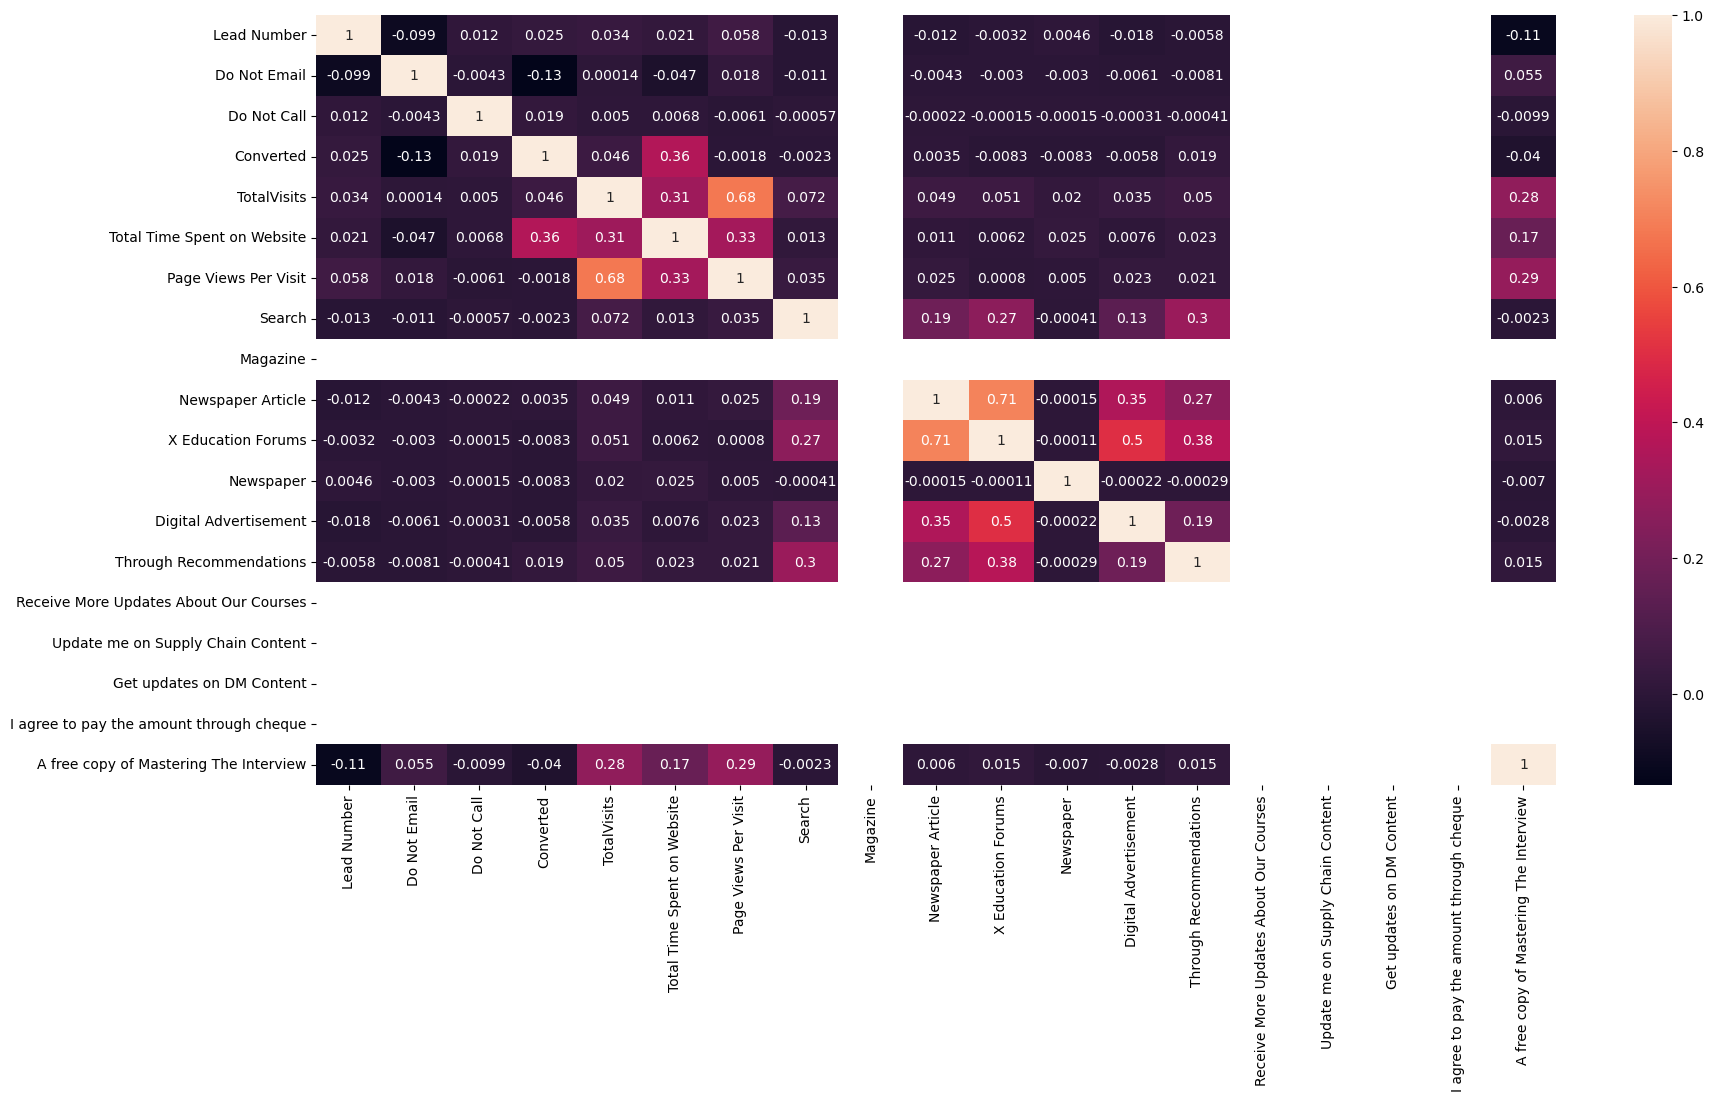

In [100]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(lead.corr(),annot = True)
plt.show()

In [101]:
lead.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

### Dropping highly correlated dummy variables

In [102]:
lead = lead.drop(['Page Views Per Visit', 'Newspaper Article'], 1)

In [103]:
lead.shape

(9226, 28)

### Checking the Correlation Matrix

After dropping highly correlated variables now let's check the correlation matrix again.

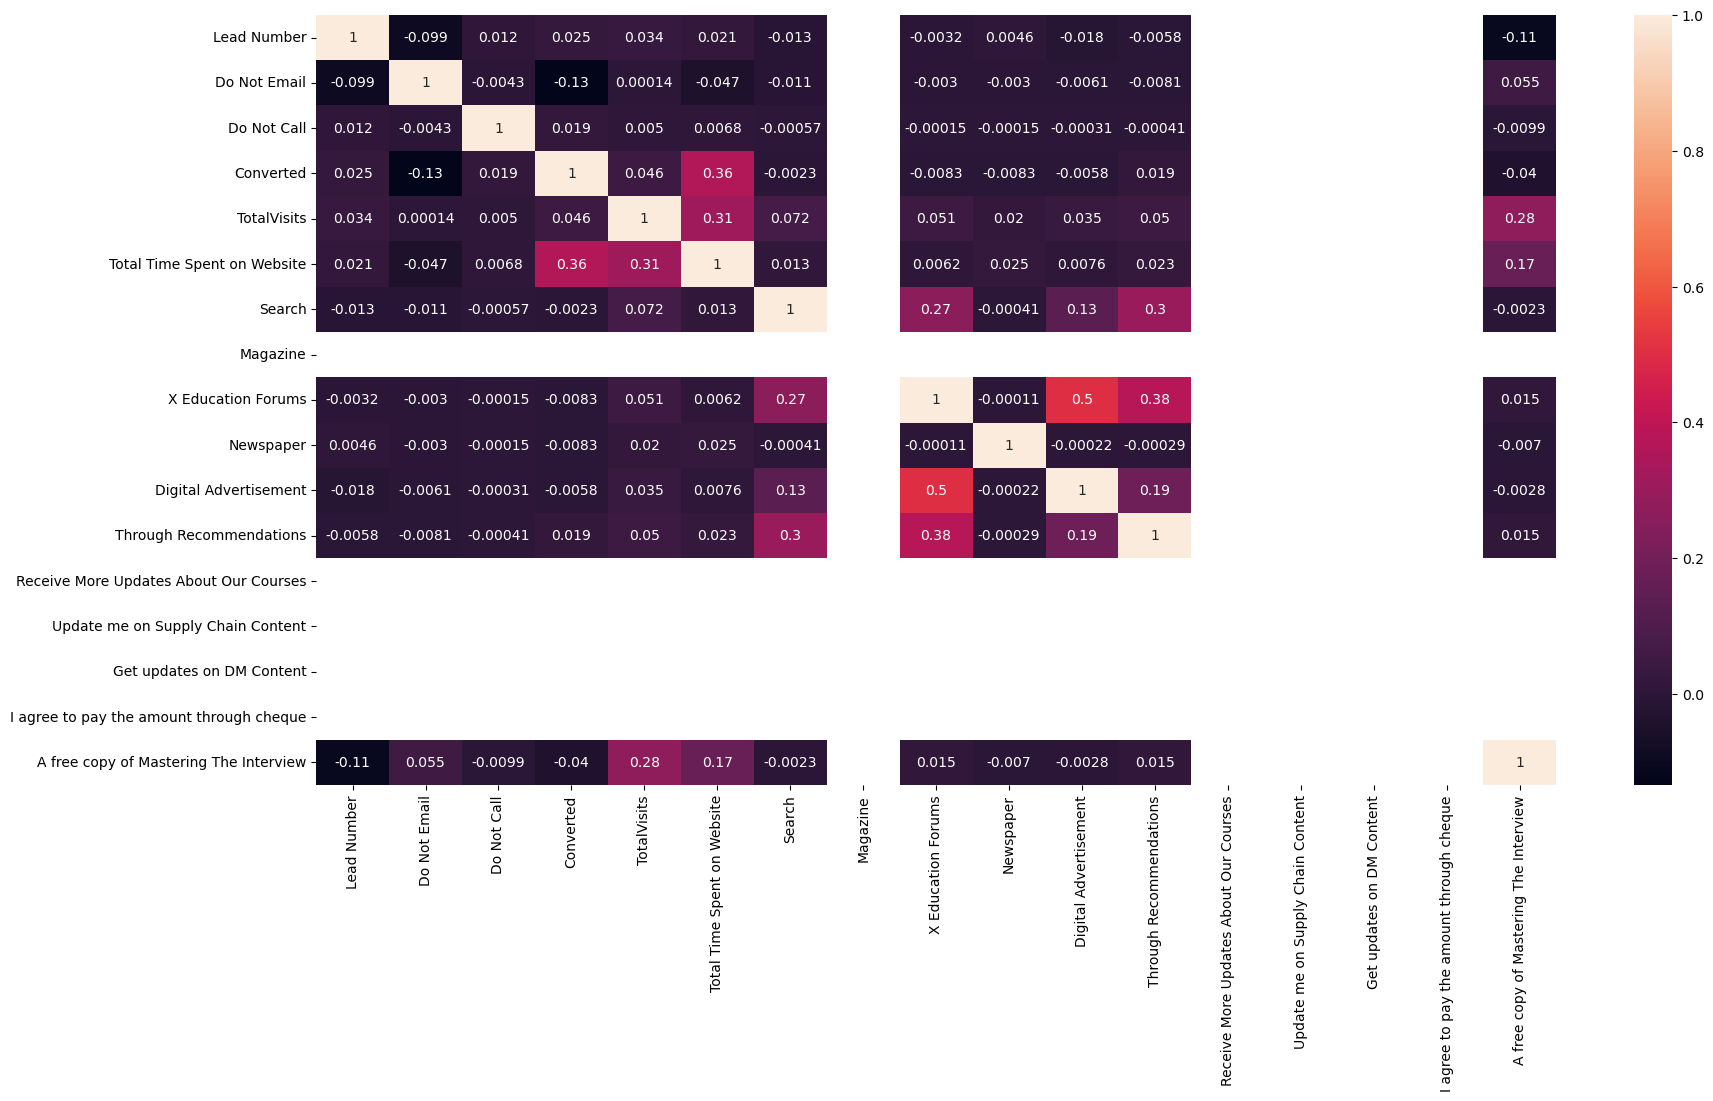

In [104]:
plt.figure(figsize = (20,10))
sns.heatmap(lead.corr(),annot = True)
plt.show()

### Creating Dummies

In [105]:
cat_cols = ['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'How did you hear about X Education','What is your current occupation','What matters most to you in choosing a course','Tags', 'Lead Profile', 'Last Notable Activity']
dummy = pd.get_dummies(lead[cat_cols],drop_first=True, dtype=int)
# dummy1.drop('Quick Add Form', axis = 1, inplace = True)
dummy

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Blank_Specialization,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How did you hear about X Education_Blank_Lead_Source,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,0,

In [106]:
lead = pd.concat([lead, dummy], axis = 1)
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Blank_Specialization,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How did you hear about X Education_Blank_Lead_Source,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Last Notable Activity_Email Bounced,Last Notab

In [107]:
lead.shape

(9226, 147)

In [108]:
lead = lead.drop(cat_cols, 1)

In [109]:
lead.head()

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Search,Magazine,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Blank_Specialization,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How did you hear about X Education_Blank_Lead_Source,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Ac

### Feature Scaling

In [110]:
scaler = StandardScaler()

col_to_scale = ["TotalVisits","Total Time Spent on Website"]

lead[col_to_scale] = scaler.fit_transform(lead[col_to_scale])

lead.head()

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Search,Magazine,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Blank_Specialization,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How did you hear about X Education_Blank_Lead_Source,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Ac

In [111]:
# Putting feature variable to X

X = lead.drop(['Converted','Lead Number'], axis=1)
X.head()

,Prospect ID,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Search,Magazine,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Blank_Specialization,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How did you hear about X Education_Blank_Lead_Source,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Con

In [112]:
# Putting response variable to y
y = lead['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [113]:
### Checking the Conversion Rate
conversion = (sum(lead['Converted'])/len(lead['Converted'].index))*100
conversion

38.57576414480815

### Test-Train Split

In [114]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [115]:
# Bringing Prospect ID as the key to identify any lead

X_train_with_prosp_ID = pd.DataFrame(['Prospect ID'])
X_train_with_prosp_ID = X_train['Prospect ID']

X_test_with_prosp_ID = pd.DataFrame(['Prospect ID'])
X_test_with_prosp_ID = X_test['Prospect ID']


In [116]:
X_train = X_train.drop(['Prospect ID'], axis=1)
X_test = X_test.drop(['Prospect ID'], axis=1)

In [117]:
X_train_with_prosp_ID.shape

(6458,)

In [118]:
X_test_with_prosp_ID.shape

(2768,)

In [119]:
print("Train X shape:",X_train.shape)
print("Test X shape:",X_test.shape)
print("Train y shape:",y_train.shape)
print("Test y shape:",y_test.shape)

Train X shape: (6458, 134)
Test X shape: (2768, 134)
Train y shape: (6458,)
Test y shape: (2768,)


### Model Building

In [120]:
# X_train_sm=sm.add_constant(X_train,has_constant="add")
# X_test_sm=sm.add_constant(X_test,has_constant="add")

In [121]:
y_train.head()

4678    0
4328    0
3650    0
1051    1
8706    0
Name: Converted, dtype: int64

In [122]:
# model1=sm.GLM(np.array(y_train["Converted"]),X_train_sm,family=sm.families.Binomial())
# # Binomial --> Binary Classification
# result1=model1.fit()
# result1.summary()
# #Generalised Linear Model

In [123]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
print(logm1.fit().summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6458
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                          122
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 18 Feb 2024   Deviance:                       46420.
Time:                        17:09:20   Pearson chi2:                 2.27e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------

In [124]:
X_train.shape

(6458, 134)

In [125]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [126]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select = 20)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

In [127]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 88),
 ('TotalVisits', False, 74),
 ('Total Time Spent on Website', False, 4),
 ('Search', False, 26),
 ('Magazine', False, 108),
 ('X Education Forums', False, 73),
 ('Newspaper', False, 107),
 ('Digital Advertisement', False, 58),
 ('Through Recommendations', False, 84),
 ('Receive More Updates About Our Courses', False, 115),
 ('Update me on Supply Chain Content', False, 110),
 ('Get updates on DM Content', False, 113),
 ('I agree to pay the amount through cheque', False, 106),
 ('A free copy of Mastering The Interview', False, 86),
 ('Lead Origin_Landing Page Submission', False, 37),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 75),
 ('Lead Origin_Quick Add Form', False, 112),
 ('Lead Source_Direct Traffic', False, 54),
 ('Lead Source_Facebook', False, 27),
 ('Lead Source_Google', False, 62),
 ('Lead Source_Live Chat', False, 96),
 ('Lead Source_NC_EDM', False, 19),
 ('Lead Source_Olark Chat', False,

In [128]:
# Features that RFE selected which are relatively significant ( = True)
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Lead Origin_Lead Add Form', 'Last Activity_SMS Sent',
       'What is your current occupation_Businessman',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lateral student', 'Tags_Lost to EINS',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_invalid number', 'Tags_switched off',
       'Lead Profile_Student of SomeSchool', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [129]:
# Columns which RFE did not select ( = False)
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Total Time Spent on Website', 'Search',
       'Magazine', 'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'Receive More Updates About Our Courses',
       ...
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Email Received',
       'Last Notable Activity_Form Submitted on Website',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed',
       'Last Notable Activity_View in browser link Clicked'],
      dtype='object', length=114)

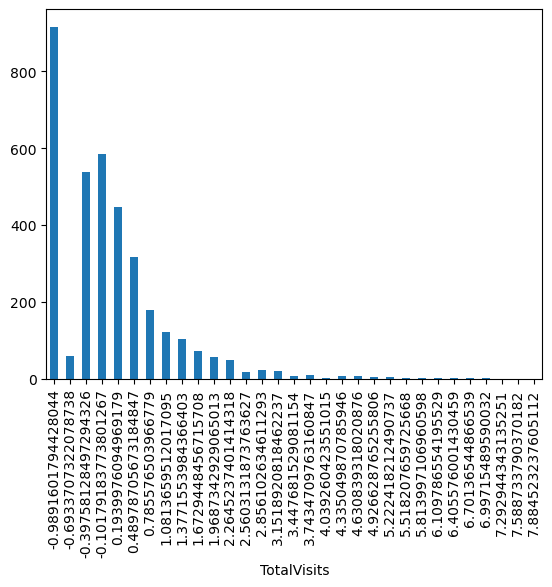

In [130]:
lead.groupby(by = 'TotalVisits')['Converted'].sum().plot.bar()
plt.show()

In [131]:
col = col.to_list()
col

['Do Not Email',
 'Lead Origin_Lead Add Form',
 'Last Activity_SMS Sent',
 'What is your current occupation_Businessman',
 'What is your current occupation_Housewife',
 'What is your current occupation_Other',
 'What is your current occupation_Student',
 'What is your current occupation_Unemployed',
 'What is your current occupation_Working Professional',
 'Tags_Busy',
 'Tags_Closed by Horizzon',
 'Tags_Lateral student',
 'Tags_Lost to EINS',
 'Tags_Ringing',
 'Tags_Will revert after reading the email',
 'Tags_invalid number',
 'Tags_switched off',
 'Lead Profile_Student of SomeSchool',
 'Last Notable Activity_Modified',
 'Last Notable Activity_Olark Chat Conversation']

In [132]:
# Adding this feature on top of what RFE suggested as this looks to be very relevant to the Lead Scorign use case

col.append('TotalVisits')

In [133]:
col

['Do Not Email',
 'Lead Origin_Lead Add Form',
 'Last Activity_SMS Sent',
 'What is your current occupation_Businessman',
 'What is your current occupation_Housewife',
 'What is your current occupation_Other',
 'What is your current occupation_Student',
 'What is your current occupation_Unemployed',
 'What is your current occupation_Working Professional',
 'Tags_Busy',
 'Tags_Closed by Horizzon',
 'Tags_Lateral student',
 'Tags_Lost to EINS',
 'Tags_Ringing',
 'Tags_Will revert after reading the email',
 'Tags_invalid number',
 'Tags_switched off',
 'Lead Profile_Student of SomeSchool',
 'Last Notable Activity_Modified',
 'Last Notable Activity_Olark Chat Conversation',
 'TotalVisits']

In [134]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6458
Model:                            GLM   Df Residuals:                     6436
Model Family:                Binomial   Df Model:                           21
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1356.4
Date:                Sun, 18 Feb 2024   Deviance:                       2712.9
Time:                        17:09:39   Pearson chi2:                 2.18e+04
No. Iterations:                    21   Pseudo R-squ. (CS):             0.6010
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [135]:
# Removing feature with high p-Value
col.remove('What is your current occupation_Housewife')

In [136]:
col

['Do Not Email',
 'Lead Origin_Lead Add Form',
 'Last Activity_SMS Sent',
 'What is your current occupation_Businessman',
 'What is your current occupation_Other',
 'What is your current occupation_Student',
 'What is your current occupation_Unemployed',
 'What is your current occupation_Working Professional',
 'Tags_Busy',
 'Tags_Closed by Horizzon',
 'Tags_Lateral student',
 'Tags_Lost to EINS',
 'Tags_Ringing',
 'Tags_Will revert after reading the email',
 'Tags_invalid number',
 'Tags_switched off',
 'Lead Profile_Student of SomeSchool',
 'Last Notable Activity_Modified',
 'Last Notable Activity_Olark Chat Conversation',
 'TotalVisits']

In [137]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6458
Model:                            GLM   Df Residuals:                     6437
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1365.5
Date:                Sun, 18 Feb 2024   Deviance:                       2731.1
Time:                        17:09:39   Pearson chi2:                 2.28e+04
No. Iterations:                    20   Pseudo R-squ. (CS):             0.5998
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [138]:
# Removing feature with high p-Value

col.remove('Tags_Lateral student')

In [139]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6458
Model:                            GLM   Df Residuals:                     6438
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1371.6
Date:                Sun, 18 Feb 2024   Deviance:                       2743.2
Time:                        17:09:39   Pearson chi2:                 2.31e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5991
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [140]:
# Removing feature with high p-Value

col.remove('Lead Profile_Student of SomeSchool')

In [141]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6458
Model:                            GLM   Df Residuals:                     6439
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1373.8
Date:                Sun, 18 Feb 2024   Deviance:                       2747.6
Time:                        17:09:39   Pearson chi2:                 2.33e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5988
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [142]:
lead_raw['Last Activity'].value_counts()

Email Opened                    3540
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [143]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

4678    0.112128
4328    0.119789
3650    0.008324
1051    0.870692
8706    0.001601
8963    0.862039
6158    0.970420
3077    0.981319
2177    0.008964
2932    0.998777
dtype: float64

In [144]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.11212791, 0.11978878, 0.00832396, 0.87069153, 0.00160113,
       0.86203923, 0.97042024, 0.98131893, 0.00896428, 0.99877657])

In [145]:
y_train.shape

(6458,)

In [146]:
X_train_with_prosp_ID.shape

(6458,)

In [147]:
y_train_pred_final = pd.DataFrame({'Prospect ID':X_train_with_prosp_ID, 'Converted':y_train.values, 'Conversion Prob':y_train_pred})

y_train_pred_final.head()

,Prospect ID,Converted,Conversion Prob
4678,91efb141-dd2b-4ea1-a4c4-1d5d4e971c12,0,0.112128
4328,555a9665-130b-45ec-a318-8b95e36acbe2,0,0.119789
3650,f6530b9a-166e-47ff-b205-f1ac576d346f,0,0.008324
1051,a71729bb-0250-4fa4-af36-182a23a699b2,1,0.870692
8706,4ee28df7-fe26-4edb-aec2-627fafa98707,0,0.001601


#### Creating new column 'predicted' with 1 if Conversion Prob > 0.5 else 0

In [148]:
y_train_pred_final['predicted'] = y_train_pred_final['Conversion Prob'].map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Prospect ID,Converted,Conversion Prob,predicted
4678,91efb141-dd2b-4ea1-a4c4-1d5d4e971c12,0,0.112128,0
4328,555a9665-130b-45ec-a318-8b95e36acbe2,0,0.119789,0
3650,f6530b9a-166e-47ff-b205-f1ac576d346f,0,0.008324,0
1051,a71729bb-0250-4fa4-af36-182a23a699b2,1,0.870692,1
8706,4ee28df7-fe26-4edb-aec2-627fafa98707,0,0.001601,0


In [149]:
from sklearn import metrics

In [150]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['predicted'] )
print(confusion)

[[3678  252]
 [ 256 2272]]


In [151]:
# Predicted     not converted    converted
# Actual
#  not converted         3723          207
#  converted              332         2196  

In [152]:
# Let's check the overall accuracy.

accuracy_train = metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['predicted'])

print ( 'Overall Accuracy on train data = ',  round((accuracy_train * 100),2) )

Overall Accuracy on train data =  92.13


#### Checking VIFs

In [153]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [154]:
X_train[col].values

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.10179184],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.19399761],
       [ 0.        ,  0.        ,  0.        , ...,  1.        ,
         0.        , -0.69337073],
       ...,
       [ 0.        ,  1.        ,  1.        , ...,  0.        ,
         0.        , -0.98916018],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.19399761],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.98916018]])

In [155]:
X_train[col].shape

(6458, 18)

In [156]:
X_train[col].shape[1]

18

### Checking for VIF

In [157]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,What is your current occupation_Unemployed,2.42
12,Tags_Will revert after reading the email,2.01
2,Last Activity_SMS Sent,1.69
15,Last Notable Activity_Modified,1.54
11,Tags_Ringing,1.49
1,Lead Origin_Lead Add Form,1.43
9,Tags_Closed by Horizzon,1.33
7,What is your current occupation_Working Profes...,1.28
17,TotalVisits,1.12
8,Tags_Busy,1.10


##### All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

In [158]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['predicted'] )
confusion

array([[3678,  252],
       [ 256, 2272]], dtype=int64)

#### Model Accuracy Score

In [159]:
# Let's check the overall accuracy.

accuracy_train = metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['predicted'])

print ( 'Overall Accuracy on train data = ',  round((accuracy_train * 100),2) )

# metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['predicted'])

Overall Accuracy on train data =  92.13


In [160]:
#re-printing the last model for reference
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6458
Model:                            GLM   Df Residuals:                     6439
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1373.8
Date:                Sun, 18 Feb 2024   Deviance:                       2747.6
Time:                        17:09:40   Pearson chi2:                 2.33e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5988
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

## Metrics beyond simply accuracy

In [161]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['predicted'] )
confusion

array([[3678,  252],
       [ 256, 2272]], dtype=int64)

In [162]:
TP_train = confusion[1,1] # true positive 
TN_train = confusion[0,0] # true negatives
FP_train = confusion[0,1] # false positives
FN_train = confusion[1,0] # false negatives

print ('TP = ', TP_train)
print ('TN = ', TN_train)
print ('FP = ', FP_train)
print ('FN = ', FN_train)

TP =  2272
TN =  3678
FP =  252
FN =  256


In [163]:
# Let's see the sensitivity of our logistic regression model

print ('Sensitivity = ',  TP_train / float(TP_train + FN_train))

# Let us calculate specificity
print ('Specificity = ', TN_train / float(TN_train + FP_train))

#Calculate False Postive Rate (FPR) - predicting Conversion when Lead hasn't actuallly converted
print ('False Positive Rate = ', FP_train/ float(TN_train + FP_train))

print ('Positive Predictive Value = ', TP_train / float(TP_train + FP_train))
print ('Negative Predictive Value = ', TN_train / float(TN_train + FN_train))

Sensitivity =  0.8987341772151899
Specificity =  0.9358778625954198
False Positive Rate =  0.06412213740458016
Positive Predictive Value =  0.9001584786053882
Negative Predictive Value =  0.934926283680732


### Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [164]:
y_train_pred_final.head()

,Prospect ID,Converted,Conversion Prob,predicted
4678,91efb141-dd2b-4ea1-a4c4-1d5d4e971c12,0,0.112128,0
4328,555a9665-130b-45ec-a318-8b95e36acbe2,0,0.119789,0
3650,f6530b9a-166e-47ff-b205-f1ac576d346f,0,0.008324,0
1051,a71729bb-0250-4fa4-af36-182a23a699b2,1,0.870692,1
8706,4ee28df7-fe26-4edb-aec2-627fafa98707,0,0.001601,0


In [165]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    
    print ('Area unnder the curve = ', auc_score)    
    #print ('TPR = ', tpr)
    #print ('FPR = ', fpr)
    #print ('Thresholds = ', thresholds)
    
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [166]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final['Converted'], y_train_pred_final['Conversion Prob'], drop_intermediate = False )

Area unnder the curve =  0.9683671127645183


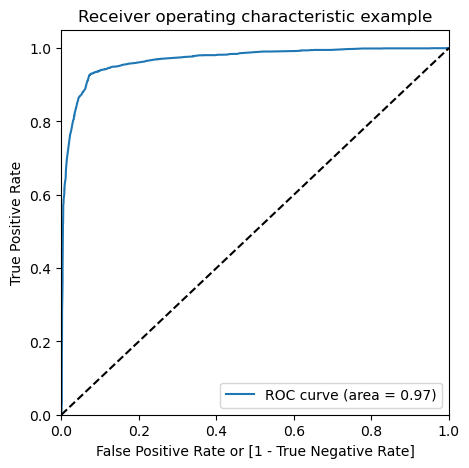

In [167]:
draw_roc(y_train_pred_final['Converted'], y_train_pred_final['Conversion Prob'])

#### Finding Optimal Cutoff Point
- Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [168]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Conversion Prob'].map(lambda x: 1 if x > i else 0)

y_train_pred_final.head()

,Prospect ID,Converted,Conversion Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
4678,91efb141-dd2b-4ea1-a4c4-1d5d4e971c12,0,0.112128,0,1,1,0,0,0,0,0,0,0,0
4328,555a9665-130b-45ec-a318-8b95e36acbe2,0,0.119789,0,1,1,0,0,0,0,0,0,0,0
3650,f6530b9a-166e-47ff-b205-f1ac576d346f,0,0.008324,0,1,0,0,0,0,0,0,0,0,0
1051,a71729bb-0250-4fa4-af36-182a23a699b2,1,0.870692,1,1,1,1,1,1,1,1,1,1,0
8706,4ee28df7-fe26-4edb-aec2-627fafa98707,0,0.001601,0,1,0,0,0,0,0,0,0,0,0


In [169]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives
#print(cutoff_df)
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final[i] )
    print(cm1)
    total1 = sum(sum(cm1))
    #print(total1)
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1]) # Specificity = TN / (TN + FP)
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1]) # Sensitivity = TP / (TP + FN)
    cutoff_df.loc[i] =[ i ,accuracy, sensitivity, specificity]

print ('*'*52)   
print (cutoff_df)

[[   0 3930]
 [   0 2528]]
[[2959  971]
 [  78 2450]]
[[3475  455]
 [ 145 2383]]
[[3612  318]
 [ 175 2353]]
[[3643  287]
 [ 187 2341]]
[[3678  252]
 [ 256 2272]]
[[3772  158]
 [ 387 2141]]
[[3797  133]
 [ 460 2068]]
[[3802  128]
 [ 473 2055]]
[[3900   30]
 [ 976 1552]]
****************************************************
     probability  accuracy  sensitivity  specificity
0.0          0.0  0.391452     1.000000     0.000000
0.1          0.1  0.837566     0.969146     0.752926
0.2          0.2  0.907092     0.942642     0.884224
0.3          0.3  0.923661     0.930775     0.919084
0.4          0.4  0.926603     0.926028     0.926972
0.5          0.5  0.921338     0.898734     0.935878
0.6          0.6  0.915609     0.846915     0.959796
0.7          0.7  0.908176     0.818038     0.966158
0.8          0.8  0.906937     0.812896     0.967430
0.9          0.9  0.844224     0.613924     0.992366


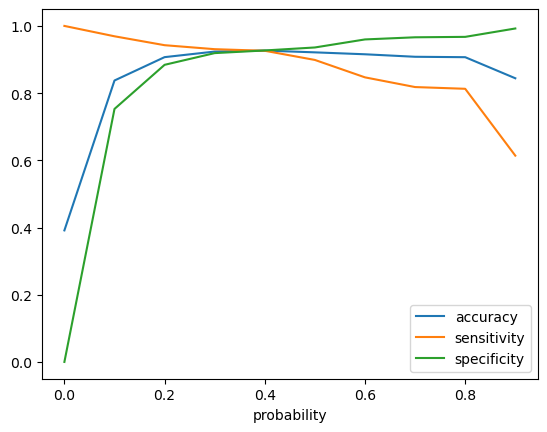

In [170]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

#### From the curve above, 0.4 is the optimum point to take it as a cutoff probability.

In [171]:
y_train_pred_final['final_predicted'] = y_train_pred_final['Conversion Prob'].map( lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Prospect ID,Converted,Conversion Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
4678,91efb141-dd2b-4ea1-a4c4-1d5d4e971c12,0,0.112128,0,1,1,0,0,0,0,0,0,0,0,0
4328,555a9665-130b-45ec-a318-8b95e36acbe2,0,0.119789,0,1,1,0,0,0,0,0,0,0,0,0
3650,f6530b9a-166e-47ff-b205-f1ac576d346f,0,0.008324,0,1,0,0,0,0,0,0,0,0,0,0
1051,a71729bb-0250-4fa4-af36-182a23a699b2,1,0.870692,1,1,1,1,1,1,1,1,1,1,0,1
8706,4ee28df7-fe26-4edb-aec2-627fafa98707,0,0.001601,0,1,0,0,0,0,0,0,0,0,0,0


In [172]:
# Let's check the overall accuracy with cut-off = 0.4

accuracy_train = metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final.final_predicted)

print ( 'Overall Accuracy on train data = ',  round((accuracy_train * 100),2) )

# metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final.final_predicted)

Overall Accuracy on train data =  92.66


In [173]:
confusion2 = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final.final_predicted )
confusion2

array([[3643,  287],
       [ 187, 2341]], dtype=int64)

#### Compare with previous cutoff of 0.5

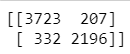

We can clearly see that the number of 'False Negatives' is now 259 which has now dropped and the number of 'True Positives' has increased. Thus, choosing a lower __cut-off of 0.4__ has definitely helped in capturing the 'Conversion' better as compared to previous cut-off of 0.5

In [174]:
TP_train = confusion2[1,1] # true positive 
TN_train = confusion2[0,0] # true negatives
FP_train = confusion2[0,1] # false positives
FN_train = confusion2[1,0] # false negatives

print ('TP = ', TP_train)
print ('TN = ', TN_train)
print ('FP = ', FP_train)
print ('FN = ', FN_train)

TP =  2341
TN =  3643
FP =  287
FN =  187


#### Let's see the Sensitivity of our logistic regression model

In [175]:
# Let's see the sensitivity of our logistic regression model

print ('Sensitivity = ',  TP_train / float(TP_train + FN_train))

# Let us calculate specificity
print ('Specificity = ', TN_train / float(TN_train + FP_train))

#Calculate False Postive Rate (FPR) - predicting Conversion when Lead hasn't actuallly converted
print ('False Positive Rate = ', FP_train/ float(TN_train + FP_train))

print ('Positive Predictive Value = ', TP_train / float(TP_train + FP_train))
print ('Negative Predictive Value = ', TN_train / float(TN_train + FN_train))

Sensitivity =  0.9260284810126582
Specificity =  0.926972010178117
False Positive Rate =  0.07302798982188295
Positive Predictive Value =  0.8907914764079148
Negative Predictive Value =  0.9511749347258486


### Precision and recall tradeoff

In [176]:
from sklearn.metrics import precision_recall_curve

In [177]:
y_train_pred_final['Converted'], y_train_pred_final.predicted

(4678    0
 4328    0
 3650    0
 1051    1
 8706    0
        ..
 351     0
 79      1
 8052    1
 6949    0
 5650    0
 Name: Converted, Length: 6458, dtype: int64,
 4678    0
 4328    0
 3650    0
 1051    1
 8706    0
        ..
 351     0
 79      1
 8052    1
 6949    0
 5650    0
 Name: predicted, Length: 6458, dtype: int64)

In [178]:
p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Conversion Prob'])

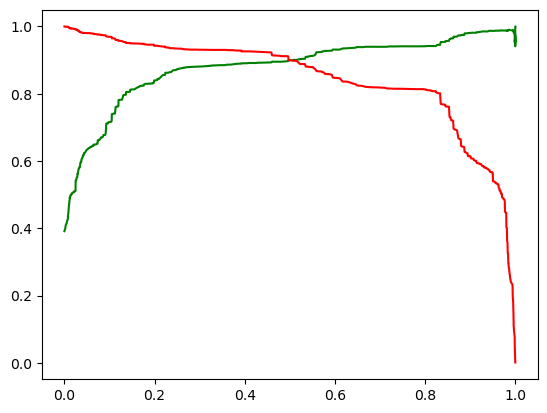

In [179]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
#plt.figure(figsize = (2,4))     
plt.show()

### Making predictions on the test set

In [180]:
X_test

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Search,Magazine,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Blank_Specialization,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How did you hear about X Education_Blank_Lead_Source,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,La

In [181]:
col

['Do Not Email',
 'Lead Origin_Lead Add Form',
 'Last Activity_SMS Sent',
 'What is your current occupation_Businessman',
 'What is your current occupation_Other',
 'What is your current occupation_Student',
 'What is your current occupation_Unemployed',
 'What is your current occupation_Working Professional',
 'Tags_Busy',
 'Tags_Closed by Horizzon',
 'Tags_Lost to EINS',
 'Tags_Ringing',
 'Tags_Will revert after reading the email',
 'Tags_invalid number',
 'Tags_switched off',
 'Last Notable Activity_Modified',
 'Last Notable Activity_Olark Chat Conversation',
 'TotalVisits']

In [182]:
X_test[col].head()

,Do Not Email,Lead Origin_Lead Add Form,Last Activity_SMS Sent,What is your current occupation_Businessman,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,TotalVisits
3224,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,-0.101792
4864,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,-0.989160
4937,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,-0.101792
7987,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0.489787
1641,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,-0.989160


In [183]:
X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Search,Magazine,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Blank_Specialization,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How did you hear about X Education_Blank_Lead_Source,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,La

In [184]:
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Search,Magazine,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Blank_Specialization,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How did you hear about X Education_Blank_Lead_Source,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,La

In [185]:
X_test_bkp = X_test

In [186]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Lead Origin_Lead Add Form,Last Activity_SMS Sent,What is your current occupation_Businessman,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,TotalVisits
3224,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,-0.101792
4864,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,-0.989160
4937,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,-0.101792
7987,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0.489787
1641,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,-0.989160


In [187]:
X_test_sm = sm.add_constant(X_test)
X_test_sm

,const,Do Not Email,Lead Origin_Lead Add Form,Last Activity_SMS Sent,What is your current occupation_Businessman,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,TotalVisits
3224,1.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,-0.101792
4864,1.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,-0.989160
4937,1.0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,-0.101792
7987,1.0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0.489787
1641,1.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,-0.989160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6666,1.0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,-0.101792
713,1.0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0.489787
8738,1.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,-0.101792
4363,1.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,-0.397581


In [188]:
y_test_pred = res.predict(X_test_sm)

In [189]:
y_test_pred[:10]

3224    0.010089
4864    0.002043
4937    0.078920
7987    0.999589
1641    0.833143
7662    0.016183
4660    0.970420
1272    0.210669
1997    0.037328
6522    0.008079
dtype: float64

In [190]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [191]:
y_pred_1.head()

,0
3224,0.010089
4864,0.002043
4937,0.078920
7987,0.999589
1641,0.833143


In [192]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

y_test_df.head()

,Converted
3224,0
4864,0
4937,0
7987,1
1641,0


In [193]:
# Putting Prespect ID

y_test_df['Prospect ID'] = X_test_with_prosp_ID

In [194]:
y_test_df.head()

,Converted,Prospect ID
3224,0,2233c787-ec6c-4472-9330-ba941f74e66e
4864,0,4867ba2b-b508-449f-b840-83c46442d754
4937,0,413fb82a-0eaa-4e44-a0f1-07276f790d4f
7987,1,b0bfbc32-bd4a-4376-a829-5318bc0e9547
1641,0,d208873b-4a7e-11e6-b61b-22000aa8e760


In [195]:
y_test_df.shape

(2768, 2)

In [196]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [197]:
# Appending y_test_df and y_pred_1
y_pred_test_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [198]:
y_pred_test_final.head()

,Converted,Prospect ID,0
0,0,2233c787-ec6c-4472-9330-ba941f74e66e,0.010089
1,0,4867ba2b-b508-449f-b840-83c46442d754,0.002043
2,0,413fb82a-0eaa-4e44-a0f1-07276f790d4f,0.078920
3,1,b0bfbc32-bd4a-4376-a829-5318bc0e9547,0.999589
4,0,d208873b-4a7e-11e6-b61b-22000aa8e760,0.833143


In [199]:
# Renaming the column 
y_pred_test_final= y_pred_test_final.rename(columns={ 0 : 'Conversion Prob'})

In [200]:
y_pred_test_final.head()

,Converted,Prospect ID,Conversion Prob
0,0,2233c787-ec6c-4472-9330-ba941f74e66e,0.010089
1,0,4867ba2b-b508-449f-b840-83c46442d754,0.002043
2,0,413fb82a-0eaa-4e44-a0f1-07276f790d4f,0.078920
3,1,b0bfbc32-bd4a-4376-a829-5318bc0e9547,0.999589
4,0,d208873b-4a7e-11e6-b61b-22000aa8e760,0.833143


In [201]:
# Rearranging the columns
y_pred_test_final = y_pred_test_final.reindex(['Prospect ID', 'Conversion Prob','Converted'], axis=1)

In [202]:
y_pred_test_final.head()

,Prospect ID,Conversion Prob,Converted
0,2233c787-ec6c-4472-9330-ba941f74e66e,0.010089,0
1,4867ba2b-b508-449f-b840-83c46442d754,0.002043,0
2,413fb82a-0eaa-4e44-a0f1-07276f790d4f,0.078920,0
3,b0bfbc32-bd4a-4376-a829-5318bc0e9547,0.999589,1
4,d208873b-4a7e-11e6-b61b-22000aa8e760,0.833143,0


In [203]:
# Predicting whether Conversion is predicted or not with new cut-off

y_pred_test_final['final_predicted'] = y_pred_test_final['Conversion Prob'].map(lambda x: 1 if x > 0.4 else 0)

y_pred_test_final.head()

,Prospect ID,Conversion Prob,Converted,final_predicted
0,2233c787-ec6c-4472-9330-ba941f74e66e,0.010089,0,0
1,4867ba2b-b508-449f-b840-83c46442d754,0.002043,0,0
2,413fb82a-0eaa-4e44-a0f1-07276f790d4f,0.078920,0,0
3,b0bfbc32-bd4a-4376-a829-5318bc0e9547,0.999589,1,1
4,d208873b-4a7e-11e6-b61b-22000aa8e760,0.833143,0,1


In [204]:
y_pred_test_final.shape

(2768, 4)

In [205]:
# Let's check the overall accuracy.
accuracy_test_data = metrics.accuracy_score(y_pred_test_final['Converted'], y_pred_test_final['final_predicted'])

print ('Overall Accuracy on test data = ', round(accuracy_test_data * 100,2))

Overall Accuracy on test data =  92.85


In [206]:
confusion_test = metrics.confusion_matrix(y_pred_test_final['Converted'], y_pred_test_final['final_predicted'] )
confusion_test

array([[1613,  124],
       [  74,  957]], dtype=int64)

In [207]:
TP_test = confusion_test[1,1] # true positive 
TN_test = confusion_test[0,0] # true negatives
FP_test = confusion_test[0,1] # false positives
FN_test = confusion_test[1,0] # false negatives

print ('TP = ', TP_test)
print ('TN = ', TN_test)
print ('FP = ', FP_test)
print ('FN = ', FN_test)

TP =  957
TN =  1613
FP =  124
FN =  74


In [208]:
# Let's see the sensitivity of our logistic regression model

print ('Sensitivity = ',  TP_test / float(TP_test + FN_test))

# Let us calculate specificity
print ('Specificity = ', TN_test / float(TN_test + FP_test))

#Calculate False Postive Rate (FPR) - predicting Conversion when Lead hasn't actuallly converted
print ('False Positive Rate = ', FP_train/ float(TN_test + FP_test))

print ('Positive Predictive Value = ', TP_test / float(TP_test + FP_test))
print ('Negative Predictive Value = ', TN_test / float(TN_test + FN_test))

Sensitivity =  0.9282250242483027
Specificity =  0.9286125503742084
False Positive Rate =  0.1652274035693725
Positive Predictive Value =  0.8852913968547641
Negative Predictive Value =  0.9561351511558981


Final summary from Train Data Set for comparison

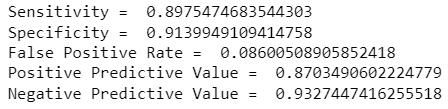

### Additional metrics/ summary with Lead data 

In [209]:
y_pred_test_final.shape

(2768, 4)

In [210]:
y_pred_test_final.head()

,Prospect ID,Conversion Prob,Converted,final_predicted
0,2233c787-ec6c-4472-9330-ba941f74e66e,0.010089,0,0
1,4867ba2b-b508-449f-b840-83c46442d754,0.002043,0,0
2,413fb82a-0eaa-4e44-a0f1-07276f790d4f,0.078920,0,0
3,b0bfbc32-bd4a-4376-a829-5318bc0e9547,0.999589,1,1
4,d208873b-4a7e-11e6-b61b-22000aa8e760,0.833143,0,1


In [211]:
y_train_pred_final.shape

(6458, 15)

In [212]:
y_train_pred_final_t = y_train_pred_final[['Prospect ID','Conversion Prob', 'Converted', 'final_predicted']]

In [213]:
y_train_pred_final_t.columns

Index(['Prospect ID', 'Conversion Prob', 'Converted', 'final_predicted'], dtype='object')

In [214]:
y_pred_test_final.columns

Index(['Prospect ID', 'Conversion Prob', 'Converted', 'final_predicted'], dtype='object')

In [215]:
conv_pred_train_test_concat = pd.concat([y_train_pred_final_t, y_pred_test_final], axis = 0)

In [216]:
conv_pred_train_test_concat.shape

(9226, 4)

In [217]:
lead.shape

(9226, 137)

In [218]:
final_predicted_lead_score = pd.merge(lead_raw, conv_pred_train_test_concat, how='inner', on='Prospect ID')
final_predicted_lead_score.shape

(9226, 33)

In [219]:
final_predicted_lead_score.head(2)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted_x,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Conversion Prob,Converted_y,final_predicted
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Finance Management,Blank_Lead_Source,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,0,0,Potential Lead,0,0,Modified,0.007729,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Finance Management,Blank_Lead_Source,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,0,0,Potential Lead,0,0,Email Opened,0.011697,0,0


In [220]:
X_train_sm.head()

,const,Do Not Email,Lead Origin_Lead Add Form,Last Activity_SMS Sent,What is your current occupation_Businessman,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,TotalVisits
4678,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,-0.101792
4328,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.193998
3650,1.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,-0.693371
1051,1.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0.193998
8706,1.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,-0.989160


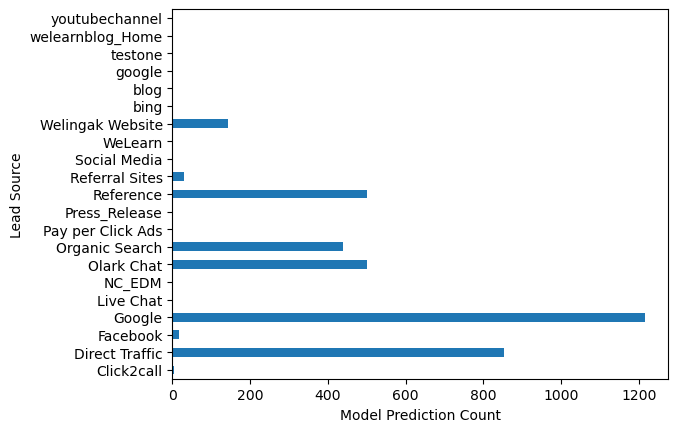

In [221]:
final_predicted_lead_score.groupby(by = 'Lead Source')['final_predicted'].sum().plot.barh(ylabel = 'Lead Source', xlabel = 'Model Prediction Count')
plt.show()

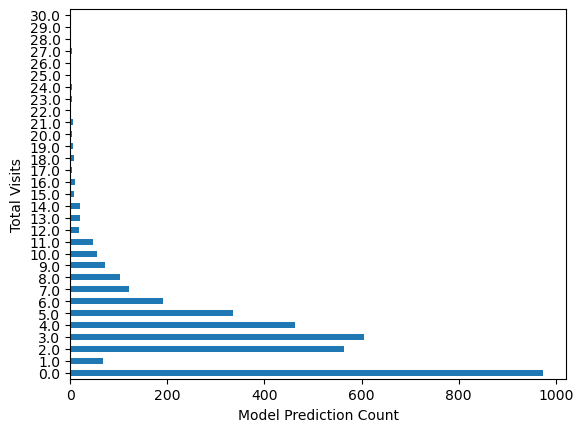

In [222]:
final_predicted_lead_score.groupby(by = 'TotalVisits')['final_predicted'].sum().plot.barh(ylabel = 'Total Visits', xlabel = 'Model Prediction Count')
plt.show()

## End of Lead Scoring !